<a href="https://colab.research.google.com/github/sbs23003/CA-Contstruction-Industry/blob/main/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ireland Construction Sector

In [ ]:
!pip install ruptures

In [ ]:
!pip install pandas sklearn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

import ruptures as rpt

## Importing the data

In [3]:


"""
# Housing Prices dataset - Columns 'Quarter', 'Value' where 'Type of Employee' = "All employees" and 'Economic Sector NACE Rev 2' = "Construction (F)"
df_housingPrices = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HPA09/CSV/1.0/en')

# Rent Prices dataset - Columns 'Quarter', 'Value' where 'Type of Employee' = "All employees" and 'Economic Sector NACE Rev 2' = "Construction (F)"
df_rentPrices = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/RIA02/CSV/1.0/en')
#df_GDP = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5454986.csv')

# Labour Costs dataset - Columns 'Quarter', 'Value' where 'Type of Employee' = "All employees" and 'Economic Sector NACE Rev 2' = "Construction (F)"
df_labourCosts = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/EHQ03/CSV/1.0/en')

# Construction Workers dataset - Columns 'Quarter', 'Value' where 'Sex' = "Both Sexes"
df_constructionWorkers = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/QLF03/CSV/1.0/en')

# Buildings Built dataset - Columns 'Year' and 'Values'
df_buildingsBuilt = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NDA02/CSV/1.0/en')
df_buildingsBuiltEircodes = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NDA01/CSV/1.0/en')
df_immigration = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA15/CSV/1.0/en')
#df_wages = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HPA09/CSV/1.0/en')
df_population = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA11/CSV/1.0/en')
#print(df_buildingsBuiltEircodes)
"""
API_TOKEN = 'ad005721228c69020f7e463880e587ea18c861f6'

df_housingPriceIRL = pd.read_csv(
    'https://www.econdb.com/api/series/PRC_HPI_Q.L7D9AO0463.Q.IE/?token=%s&format=csv' % API_TOKEN,
    index_col='Date', parse_dates=['Date'])

In [5]:
API_TOKEN = 'ad005721228c69020f7e463880e587ea18c861f6'


# HOUSE PRICE INDEX
df_housePriceIndex = pd.read_csv(
	'https://www.econdb.com/api/series/?token=690defcf873cbbcaeed76b709a38d93635718106&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2007-01-01&to=2022-01-01&FREQ=%5BA%5D&GEO=%5BIE%2CSE%2CDK%5D&PURCHASE=%5BTOTAL%5D&UNIT=%5BI10_A_AVG%5D&format=csv&dataset=PRC_HPI_A')
df_housePriceIndex.rename(columns={'PRC_HPI_A.L7D9AO04A0.Y.IE': 'House Price Index IRELAND',
                                   'PRC_HPI_A.L7D9AO04A0.Y.SE': 'House Price Index SWEDEN',
                                   'PRC_HPI_A.L7D9AO04A0.Y.DK': 'House Price Index DENMARK'}, inplace=True)
# RENTS INDEX
df_rentalIndex = pd.read_csv(
	'https://www.econdb.com/api/series/?token=3acf191761e2c11acf4f16e25d7070ab791d110b&page=1&v=TIME&h=Geopolitical+entity+%28reporting%29&from=2007-08-01&to=2022-01-01&COICOP=%5BCP041%5D&FREQ=%5BA%5D&GEO=%5BIE%2CDK%2CSE%5D&UNIT=%5BINX_A_AVG%5D&format=csv&dataset=PRC_HICP_AIND')
df_rentalIndex.rename(columns={'PRC_HICP_AIND.3073C32B86.Y.IE': 'Rental Index IRELAND',
                                   'PRC_HICP_AIND.3073C32B86.Y.SE': 'Rental Index SWEDEN',
                                   'PRC_HICP_AIND.3073C32B86.Y.DK': 'Rental Index DENMARK'}, inplace=True)

# BUILIDING PERMITS 
df_buildingPermits = pd.read_csv(
  'https://www.econdb.com/api/series/?token=b98aad1e843d9ea5ec17dc6dd39ae75ea0282503&page=1&v=TIME&h=Geopolitical+entity+%28reporting%29&from=2010-01-01&to=2022-01-01&CPA2_1=%5BCPA_F41001_41002%2CCPA_F41002%2CCPA_F41002_X_410023%2CCPA_F410023%2CCPA_F410011%2CCPA_F410014%2CCPA_F41001%2CCPA_F41001_X_410014%2CCPA_F410012_410013%5D&FREQ=%5BA%5D&GEO=%5BDK%2CIE%2CSE%5D&INDIC_BT=%5BPNUM%5D&S_ADJ=%5BNSA%5D&UNIT=%5BI15%5D&format=csv&dataset=STS_COBP_A')
df_buildingPermits.rename(columns={'STS_COBP_A.P3D0135A9900035.Y.IE': 'Residential Permits IRL', 'STS_COBP_A.P3D0135A9932B3B.Y.IE': 'Residential Permits % IRL', 'STS_COBP_A.P3D0235A9932B3B.Y.IE': '1 dwelling Permits IRL', 'STS_COBP_A.P3D0335A9932B3B.Y.IE': '2+ dwelling Permits IRL', 
                                   'STS_COBP_A.P3D0135A9900035.Y.SE': 'Residential Permits SWEDEN', 'STS_COBP_A.P3D0135A9932B3B.Y.SE': 'Residential Permits % SWEDEN', 'STS_COBP_A.P3D0235A9932B3B.Y.SE': '1 dwelling Permits SWEDEN', 'STS_COBP_A.P3D0335A9932B3B.Y.SE': '2+ dwelling Permits SWEDEN', 
                                   'STS_COBP_A.P3D0135A9900035.Y.DK': 'Residential Permits DENMARK', 'STS_COBP_A.P3D0135A9932B3B.Y.DK': 'Residential Permits % DENMARK', 'STS_COBP_A.P3D0235A9932B3B.Y.DK': '1 dwelling Permits DENMARK', 'STS_COBP_A.P3D0335A9932B3B.Y.DK': '2+ dwelling Permits DENMARK'}, inplace=True)

# NUMBER OF ENTERPRISES AND EMPLOYEES
df_enterprises = pd.read_csv(
	'https://www.econdb.com/api/series/?token=74cd5ad46ce82db55826b7d3b08f6b26c5f8a68f&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2009-01-01&to=2023-01-01&FREQ=%5BA%5D&GEO=%5BIE%2CSE%2CDK%5D&INDIC_SB=%5BV11110%2CV16130%5D&NACE_R2=%5BF%5D&format=csv&dataset=SBS_NA_CON_R2')
df_enterprises.rename(columns={'SBS_NA_CON_R2.357D80003E.Y.IE': 'Number of Companies IRELAND', 'SBS_NA_CON_R2.35AEC0003E.Y.IE': 'Number of Emplyees IRELAND', 
                               'SBS_NA_CON_R2.357D80003E.Y.SE': 'Number of Companies SWEDEN', 'SBS_NA_CON_R2.35AEC0003E.Y.SE': 'Number of Emplyees SWEDEN', 
                               'SBS_NA_CON_R2.357D80003E.Y.DK': 'Number of Companies DENMARK', 'SBS_NA_CON_R2.35AEC0003E.Y.DK': 'Number of Emplyees DENMARK'}, inplace=True)

# CONSTRUCTION COST INDEX
df_contructionCostIndex = pd.read_csv(
	'https://www.econdb.com/api/series/?token=a24930c112c9f08032dd2962a680be649c5c8e74&page=1&v=TIME&h=Geopolitical+entity+%28reporting%29&from=2009-01-01&to=2022-01-01&GEO=%5BIE%2CSE%2CDK%5D&INDIC_BT=%5BCSTI%5D&UNIT=%5BI15%5D&format=csv&dataset=STS_COPI_A')
df_contructionCostIndex.rename(columns={'STS_COPI_A.35AA432B3B.Y.IE': 'Construction cost index IRELAND', 
                                        'STS_COPI_A.35AA432B3B.Y.SE': 'Construction cost index SWEDEN', 
                                        'STS_COPI_A.35AA432B3B.Y.DK': 'Construction cost index DENMARK'}, inplace=True)


# CONSTRUCTION PRODUCTION VOLUME 
df_productionVolume = pd.read_csv(
	'https://www.econdb.com/api/series/?token=40f0399619a27af5ad3afba304da54f6dda7ee5b&page=1&FREQ=%5BA%5D&GEO=%5BDK%2CSE%2CIE%5D&INDIC_BT=%5BPROD%5D&NACE_R2=%5BF%5D&S_ADJ=%5BCA%5D&UNIT=%5BI15%5D&from=2009-01-01&h=TIME&to=2022-01-01&v=Geopolitical+entity+%28reporting%29&format=csv&dataset=STS_COPR_A')
df_productionVolume.rename(columns={'STS_COPR_A.0003E19F6E32B3B.Y.IE': 'Volume of Production IRELAND', 
                                    'STS_COPR_A.0003E19F6E32B3B.Y.SE': 'Volume of Production SWEDEN', 
                                    'STS_COPR_A.0003E19F6E32B3B.Y.DK': 'Volume of Production DENMARK'}, inplace=True)

# CONSTRUCTION WORK VOLUME
df_labour = pd.read_csv(
	'https://www.econdb.com/api/series/?token=2ec39fb4142bc7023af276e442c08fac7fed7f22&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2009-01-01&to=2022-01-01&FREQ=%5BA%5D&GEO=%5BIE%2CSE%2CDK%5D&INDIC_BT=%5BHOWK%2CWAGE%5D&NACE_R2=%5BF%5D&S_ADJ=%5BCA%5D&UNIT=%5BI15%5D&format=csv&dataset=STS_COLB_A')
df_labour.rename(columns={'STS_COLB_A.35A9119F6E32B3B.Y.IE': 'Labour Costs IRELAND', 'STS_COLB_A.35A9019F6E32B3B.Y.IE': 'Hours Worked IRELAND', 
                              'STS_COLB_A.35A9119F6E32B3B.Y.SE': 'Labour Costs SWEDEN', 'STS_COLB_A.35A9019F6E32B3B.Y.SE': 'Hours Worked SWEDEN', 
                              'STS_COLB_A.35A9119F6E32B3B.Y.DK': 'Labour Costs DENMARK', 'STS_COLB_A.35A9019F6E32B3B.Y.DK': 'Hours Worked DENMARK'}, inplace=True)

# POPULATION
df_population = pd.read_csv(
		'https://www.econdb.com/api/series/?token=56e2cd25e2c249580a2c6b924958b92be83f39b5&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2000-01-01&to=2022-01-01&AGE=%5BTOTAL%5D&FREQ=%5BA%5D&GEO=%5BIE%2CSE%2CDK%5D&SEX=%5BT%5D&UNIT=%5BNR%5D&format=csv&dataset=DEMO_PJAN')
df_population.rename(columns={'DEMO_PJAN.00AD30088C.Y.IE': 'Population IRELAND', 
                              'DEMO_PJAN.00AD30088C.Y.SE': 'Population SWEDEN', 
                              'DEMO_PJAN.00AD30088C.Y.DK': 'Population DENMARK'}, inplace=True)

# MIGRATION/IMMIGRATION
df_demography = pd.read_csv(
		'https://www.econdb.com/api/series/?token=5ad1830eba5e5df98e2c5baff21be3d120bfd320&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2010-01-01&to=2022-01-01&FREQ=%5BA%5D&GEO=%5BDK%2CSE%2CIE%5D&INDIC_DE=%5BMIGT%2CCNMIGRAT%5D&format=csv&dataset=DEMO_GIND')
df_demography.rename(columns={'DEMO_GIND.1743F.Y.IE': 'Net Migration IRELAND', 'DEMO_GIND.GB66D.Y.IE': 'Sum Migration/Immigration IRELAND', 
                              'DEMO_GIND.1743F.Y.DK': 'Net Migration SWEDEN', 'DEMO_GIND.GB66D.Y.DK': 'Sum Migration/Immigration SWEDEN', 
                              'DEMO_GIND.1743F.Y.SE': 'Net Migration DENMARK', 'DEMO_GIND.GB66D.Y.SE': 'Sum Migration/Immigration DENMARK'}, inplace=True)

df_demography['Net Immigration IRELAND'] = df_demography['Sum Migration/Immigration IRELAND'] - df_demography['Net Migration IRELAND']
df_demography['Net Immigration SWEDEN'] = df_demography['Sum Migration/Immigration SWEDEN'] - df_demography['Net Migration SWEDEN']
df_demography['Net Immigration DENMARK'] = df_demography['Sum Migration/Immigration DENMARK'] - df_demography['Net Migration DENMARK']

#HOUSE SALES
df_houseSales = pd.read_csv(
		'https://www.econdb.com/api/series/?token=c2968eb909528dffe9c462d6fbaadd7b98eb607f&page=1&v=TIME&h=Geopolitical+entity+%28reporting%29&from=2009-02-01&to=2022-10-01&PURCHASE=%5BTOTAL%2CDW_NEW%2CDW_EXST%5D&UNIT=%5BI15_Q%5D&GEO=%5BIE%2CDK%2CSE%5D&format=csv&dataset=PRC_HPI_Q')
df_houseSales.rename(columns={'PRC_HPI_Q.L7D9AO0463.Q.IE': 'Total Purchases IRELAND', 'PRC_HPI_Q.L7D9BO0463.Q.IE': 'Purchases of New Dwellings IRELAND', 'PRC_HPI_Q.L7D9CO0463.Q.IE': 'Purchases of Existing Dwellings IRELAND', 
                              'PRC_HPI_Q.L7D9AO0463.Q.SE': 'Total Purchases SWEDEN',  'PRC_HPI_Q.L7D9BO0463.Q.SE': 'Purchases of New Dwellings SWEDEN',  'PRC_HPI_Q.L7D9CO0463.Q.SE': 'Purchases of Existing Dwellings SWEDEN',
                              'PRC_HPI_Q.L7D9AO0463.Q.DK': 'Total Purchases DENMARK', 'PRC_HPI_Q.L7D9BO0463.Q.DK': 'Purchases of New Dwellings DENMARK', 'PRC_HPI_Q.L7D9CO0463.Q.DK': 'Purchases of Existing Dwellings DENMARK'}, inplace=True)

# ANUAL NET EARNING
df_netEarning = pd.read_csv('/content/earnings.csv', names=['COUNTRY', 'Date', 'Net Earnings'])


df = df_houseSales.copy()
# Convert 'date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'date' column
df['year'] = df['Date'].dt.year

# Group by 'year' and calculate the mean for other columns
df_grouped = df.groupby('year').mean().reset_index()

# Rename 'year' column to 'date'
df_grouped.rename(columns={'year': 'Date'}, inplace=True)

# Display the transformed data
df_houseSales = df_grouped

# GDP
df_GDP = pd.read_csv('/content/gdp.csv')


<ipython-input-5-0c4975c248e4>:90: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('year').mean().reset_index()


In [ ]:
# Merging All the datasets

# List of dataframes to merge
dfs = [df_housePriceIndex, df_buildingPermits, df_demography, df_population, 
       df_enterprises, df_contructionCostIndex, df_labour, df_rentalIndex, df_houseSales, df_productionVolume ]

# Initialize merged dataframe
merged_df = dfs[0]

# Merge each dataframe
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on="Date")

# Convert 'Date' column to datetime and get the year
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.year

# Merge with df_grouped
merged_df = pd.merge(merged_df, df_grouped, on="Date")

merged_df

# Part 1

In [6]:
df_GDP.columns

Index(['Indicator', 'Country', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for GDP indicator
gdp_data = df_GDP[df_GDP['Indicator'] == 'GDP']

# Group the filtered data by country
country_data = gdp_data.groupby('Country')

# Plot the time series for each country
for country, data in country_data:
    plt.figure()  # Create a new figure for each country
    plt.plot(data.columns[2:], data.iloc[:, 2:].values.flatten())
    plt.xlabel('Year')
    plt.ylabel('GDP Value')
    plt.title(f'Time Series Graph for GDP - {country}')
    plt.show()


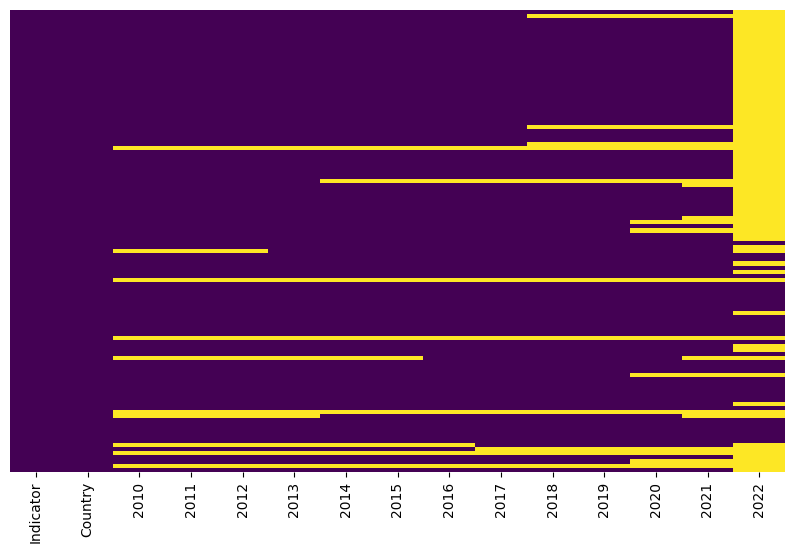

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a pandas DataFrame df

# Create a boolean dataframe where True means a missing value and False means a non-missing value.
missing_data = df_GDP.isnull()

# Generate a heatmap. Yellow color will indicate missing values.
plt.figure(figsize=(10,6))
sns.heatmap(missing_data, cmap='viridis', cbar=False, yticklabels=False)

# Show the plot.
plt.show()

In [9]:
df_interpolated = df_GDP.interpolate(method='linear')


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a pandas DataFrame df

# Create a boolean dataframe where True means a missing value and False means a non-missing value.
missing_data = df_final.isnull()

# Generate a heatmap. Yellow color will indicate missing values.
plt.figure(figsize=(10,6))
sns.heatmap(missing_data, cmap='viridis', cbar=False, yticklabels=False)

# Show the plot.
plt.show()

NameError: ignored

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer

# let's assume we have a DataFrame called df
# df = pd.read_csv('yourfile.csv')

# First, it's useful to understand how much missing data we have.
missing_values = df_GDP.isnull().sum()
percent_missing = (df_GDP.isnull().sum() / df_GDP.isnull().count()) * 100
missing_data = pd.concat([missing_values, percent_missing], axis=1, keys=['Missing Values', '% Missing'])
print(missing_data)


           Missing Values  % Missing
Indicator               0   0.000000
Country                 0   0.000000
2010                   10   8.928571
2011                   10   8.928571
2012                   10   8.928571
2013                    9   8.035714
2014                    9   8.035714
2015                    9   8.035714
2016                    8   7.142857
2017                    8   7.142857
2018                   11   9.821429
2019                   11   9.821429
2020                   15  13.392857
2021                   19  16.964286
2022                   77  68.750000


In [14]:
mean_imputer = SimpleImputer(strategy='mean')  # initiate the imputer
df_GDP['GDP'] = mean_imputer.fit_transform(df_GDP[['GDP']])  # fit and transform the column
mode_imputer = SimpleImputer(strategy='most_frequent')
df_GDP['Region'] = mode_imputer.fit_transform(df[['Region']])
df_GDP['GDP'] = df_GDPdf['GDP'].interpolate(method='linear')
print(df.isnull().sum())


KeyError: ignored

In [92]:
df = df_interpolated.copy()

df_melted = df_interpolated.melt(id_vars=['Indicator', 'Country'], var_name='Year')

# Separate the datasets
df_GDP_values = df_melted[df_melted['Indicator'] == 'GDP']
df_GDP_construction = df_melted[df_melted['Indicator'] == 'GDP share construction']

# Rename value columns
df_GDP_values = df_GDP_values.rename(columns={'value': 'GDP'})
df_GDP_construction = df_GDP_construction.rename(columns={'value': 'GDP share construction'})

# Merge the datasets on Country and Year
df_final = pd.merge(df_GDP_values, df_GDP_construction, on=['Country', 'Year'])

# Remove 'Indicator' columns
df_final = df_final.drop(columns=['Indicator_x', 'Indicator_y'])

# Reorder columns
df_final = df_final[['Year', 'Country', 'GDP','GDP share construction']]
df_final['GDP construction'] = (df_final['GDP'].astype(float) * df_final['GDP share construction'].astype(float)) / 100
df_final
df_final.rename(columns={'Year': 'Date'}, inplace=True)

In [58]:
df_final

,Date,Country,GDP,GDP share construction,GDP construction
0,2010,Albania,28046.0,14.9,4178.854
1,2010,Andorra,3048.0,9.5,289.560
2,2010,Armenia,21600.0,8.0,1728.000
3,2010,Austria,351342.0,6.5,22837.230
4,2010,Azerbaijan,132907.0,8.7,11562.909
...,...,...,...,...,...
723,2022,Turkmenistan,NaN,4.9,NaN
724,2022,Ukraine,NaN,4.9,NaN
725,2022,United Kingdom,NaN,4.9,NaN
726,2022,United States,NaN,4.9,NaN


In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 727
Data columns (total 5 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Date                                                                    728 non-null    object 
 1   Country                                                                 728 non-null    object 
 2   GDP at current prices and PPPs, millions of US$                         634 non-null    float64
 3   GDP: in construction (ISIC4 F), output approach, per cent share of GVA  616 non-null    float64
 4   GDP construction                                                        560 non-null    float64
dtypes: float64(3), object(2)
memory usage: 34.1+ KB


In [81]:
df_final.isnull().sum()

Date                                                                        0
Country                                                                     0
GDP at current prices and PPPs, millions of US$                            94
GDP: in construction (ISIC4 F), output approach, per cent share of GVA    112
GDP construction                                                          168
dtype: int64

In [82]:
df_final.shape

(728, 5)

In [83]:
df_final = df_final.dropna()

df_final.shape

(560, 5)

In [84]:
df_final.head()

,Date,Country,"GDP at current prices and PPPs, millions of US$","GDP: in construction (ISIC4 F), output approach, per cent share of GVA",GDP construction
0,2010,Albania,28046.0,14.9,4178.854
1,2010,Andorra,3048.0,9.5,289.560
3,2010,Austria,351342.0,6.5,22837.230
4,2010,Azerbaijan,132907.0,8.7,11562.909
5,2010,Belarus,145685.0,10.7,15588.295


IndexError: ignored

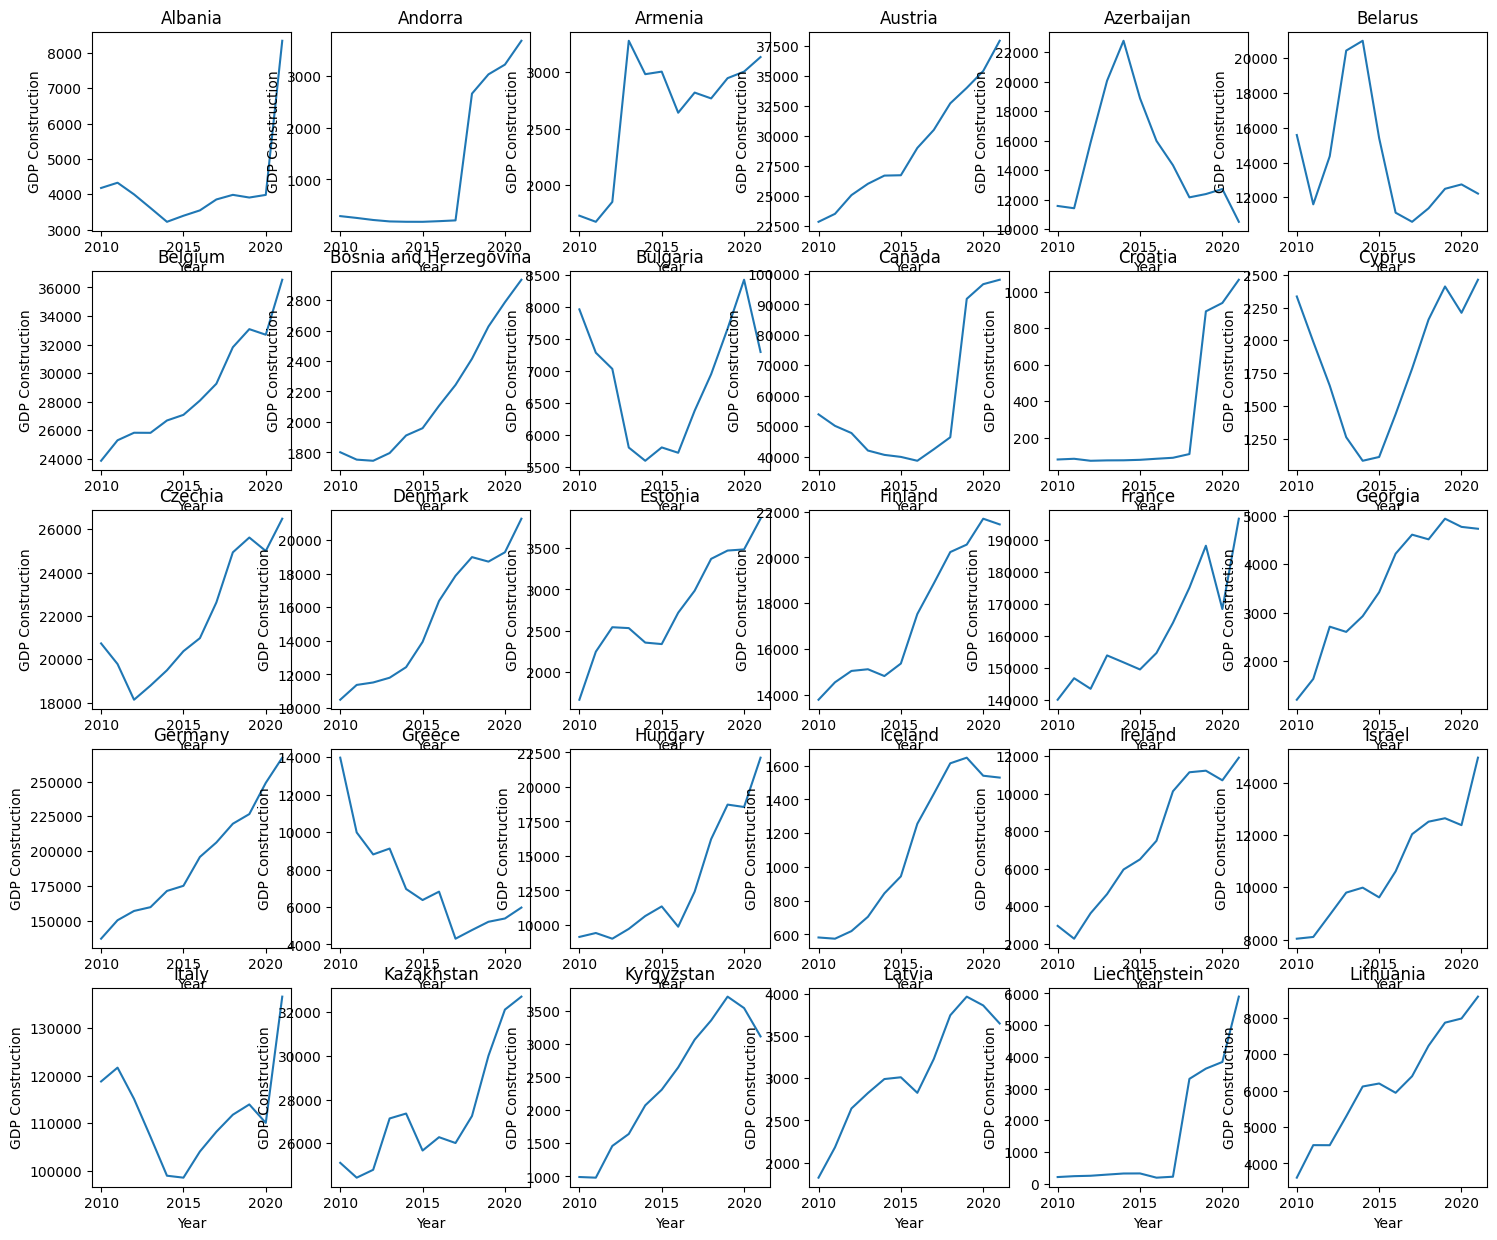

In [34]:
# reshape the dataframe to have years as columns and countries as rows
df_pivot = df_final.pivot(index='Country', columns='Date', values='GDP construction')

fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(18,15))  # Adjust grid size as per the number of countries
axs = axs.flatten()  # to iterate over the grid

for i, country in enumerate(df_pivot.index):
    df_pivot.loc[country].plot(kind='line', ax=axs[i])
    axs[i].set_title(country)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('GDP Construction')

# remove unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [35]:
# Assuming your final DataFrame from previous transformation is df_final
df_pivot = df_final.pivot(index='Date', columns='Country', values='GDP construction')

# Ensure data types for proper correlation calculation
for col in df_pivot.columns:
    df_pivot[col] = pd.to_numeric(df_pivot[col], errors='coerce')

# Calculate correlation
correlation_matrix = df_pivot.corr()


In [36]:
sorted_correlation = correlation_matrix['Ireland'].sort_values(ascending=False)

# Print the top 5 most similar/correlated countries to Ireland
top_5_countries = sorted_correlation[1:6]  # Exclude Ireland itself
print(top_5_countries)

Country
Iceland                0.983401
Denmark                0.975453
Kyrgyzstan             0.974479
Sweden                 0.973513
Republic of Moldova    0.969306
Name: Ireland, dtype: float64


# A

In [52]:
merge_aux = pd.merge(df_housePriceIndex, df_buildingPermits, on="Date")
merge_aux1 = pd.merge(merge_aux, df_demography, on="Date")
merge_aux2 = pd.merge(merge_aux1, df_population, on="Date")
merge_aux3 = pd.merge( merge_aux2, df_enterprises, on="Date")
merge_aux4 = pd.merge(merge_aux3, df_contructionCostIndex, on="Date")
merge_aux5 = pd.merge(merge_aux4, df_labour, on="Date")
merge_aux5 = pd.merge(merge_aux5, df_rentalIndex, on="Date")
merge_aux5 = pd.merge(merge_aux5, df_productionVolume, on="Date")
#merge_aux5 = pd.merge(merge_aux5, df_netEarning, on="Date")

#merge_aux5.to_csv('out.csv', index=False)
merge_aux5['Date'] = pd.to_datetime(merge_aux5['Date']).dt.year
merge_aux5 = pd.merge(merge_aux5, df_grouped, on="Date")
#df_final['Date'] = df_final['Date'].astype(int)
#merge_aux5  = pd.merge(merge_aux5, df_final, on="Date")
merge_aux5
#df_housePriceIndexPT

,Date,House Price Index DENMARK,House Price Index IRELAND,House Price Index SWEDEN,Residential Permits % DENMARK,1 dwelling Permits DENMARK,2+ dwelling Permits DENMARK,Residential Permits % IRL,1 dwelling Permits IRL,2+ dwelling Permits IRL,...,Volume of Production SWEDEN,Total Purchases DENMARK,Purchases of New Dwellings DENMARK,Purchases of Existing Dwellings DENMARK,Total Purchases IRELAND,Purchases of New Dwellings IRELAND,Purchases of Existing Dwellings IRELAND,Total Purchases SWEDEN,Purchases of New Dwellings SWEDEN,Purchases of Existing Dwellings SWEDEN
0,2010,100.00,100.00,100.0,66.6,87.5,50.8,141.7,113.2,246.0,...,87.0,90.6575,40.4825,91.4300,105.9450,117.0750,104.5700,73.9650,88.8700,71.9150
1,2011,98.30,82.92,102.6,73.2,83.1,65.7,89.3,88.8,91.2,...,93.7,89.1225,45.5825,89.6800,87.8625,97.6950,86.5875,75.8725,93.8725,73.2575
2,2012,95.65,71.76,103.9,53.3,62.7,46.3,47.9,52.6,30.8,...,93.0,86.7125,50.6225,87.1050,76.0375,85.3000,74.8525,76.8250,96.0000,73.9075
3,2013,99.37,72.66,109.2,50.9,60.6,43.6,55.2,58.6,42.8,...,90.3,90.0900,80.1575,90.1875,76.9850,78.9075,76.7950,80.7850,94.9700,78.6475
4,2014,103.10,84.67,119.5,71.3,71.9,70.9,56.8,64.6,28.1,...,91.8,93.4875,89.5375,93.5375,89.7200,86.6850,90.1625,88.4025,97.7950,87.0150
5,2015,110.30,94.38,135.2,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,99.9850,99.9950,100.0225,99.9825,100.0075,100.0150,99.9950,100.0000,100.0025
6,2016,116.10,101.40,146.3,130.4,121.0,137.6,122.3,120.2,130.0,...,103.3,105.2250,99.3650,105.2500,107.4750,107.6250,107.4500,108.2500,106.2000,108.5500
7,2017,121.30,112.40,156.1,130.3,123.5,135.5,159.3,150.6,191.0,...,114.3,110.0000,99.9900,110.0750,119.1750,113.5000,120.2250,115.4250,112.7750,115.7750
8,2018,126.60,123.90,154.6,175.2,137.6,203.6,221.9,194.8,321.2,...,121.8,114.8000,101.8000,114.9000,131.3000,124.7500,132.4000,114.3500,123.7000,112.4000
9,2019,129.60,126.80,158.4,157.6,138.6,171.9,294.9,190.9,676.4,...,122.6,117.5000,102.5500,117.6000,134.4000,129.8000,134.8000,117.1750,129.5500,114.5750


In [112]:
merge_aux5.columns

Index(['Date', 'House Price Index DENMARK', 'House Price Index IRELAND',
       'House Price Index SWEDEN', 'Residential Permits % DENMARK',
       '1 dwelling Permits DENMARK', '2+ dwelling Permits DENMARK',
       'Residential Permits % IRL', '1 dwelling Permits IRL',
       '2+ dwelling Permits IRL', 'Residential Permits % SWEDEN',
       '1 dwelling Permits SWEDEN', '2+ dwelling Permits SWEDEN',
       'Net Migration SWEDEN', 'Sum Migration/Immigration SWEDEN',
       'Net Migration IRELAND', 'Sum Migration/Immigration IRELAND',
       'Net Migration DENMARK', 'Sum Migration/Immigration DENMARK',
       'Net Immigration IRELAND', 'Net Immigration SWEDEN',
       'Net Immigration DENMARK', 'Population DENMARK', 'Population IRELAND',
       'Population SWEDEN', 'Number of Companies DENMARK',
       'Number of Emplyees DENMARK', 'Number of Companies IRELAND',
       'Number of Emplyees IRELAND', 'Number of Companies SWEDEN',
       'Number of Emplyees SWEDEN', 'Construction cost index

In [51]:
merge_aux5.shape

(11, 52)

In [52]:
merge_aux5.isnull().sum()

Date                                       0
House Price Index DENMARK                  0
House Price Index IRELAND                  0
House Price Index SWEDEN                   0
Residential Permits % DENMARK              0
1 dwelling Permits DENMARK                 0
2+ dwelling Permits DENMARK                0
Residential Permits % IRL                  0
1 dwelling Permits IRL                     0
2+ dwelling Permits IRL                    0
Residential Permits % SWEDEN               0
1 dwelling Permits SWEDEN                  0
2+ dwelling Permits SWEDEN                 0
Net Migration SWEDEN                       0
Sum Migration/Immigration SWEDEN           1
Net Migration IRELAND                      0
Sum Migration/Immigration IRELAND          1
Net Migration DENMARK                      0
Sum Migration/Immigration DENMARK          1
Net Immigration IRELAND                    1
Net Immigration SWEDEN                     1
Net Immigration DENMARK                    1
Population

In [86]:
merge_aux5.columns = merge_aux5.columns.str.replace(r'\bIRL\b', 'IRELAND')
merge_aux5.columns = merge_aux5.columns.str.replace(r'\bPT\b', 'PORTUGAL')
merge_aux5.columns = merge_aux5.columns.str.replace(r'\bRO\b', 'ROMANIA')

#merge_aux5.info()
#merge_aux5.to_csv('out.csv', index=False)
df_loc = merge_aux5.melt(id_vars='Date', var_name='Metric', value_name='Value')
df_loc[['Metric', 'COUNTRY']] = df_loc['Metric'].str.rsplit(' ', 1, expand=True)

# Pivot the DataFrame to get metrics as columns
df_loc = df_loc.pivot_table(index=['Date', 'COUNTRY'], columns='Metric', values='Value').reset_index()

# Renaming the columns
df_loc.columns.name = None
df_loc.columns = df_loc.columns.str.replace(' ', '_')

df_loc.to_csv('outsff464df1.csv', index=False)
#melted_df = pd.melt(merge_aux5, id_vars='date', var_name='COUNTRY', value_name='VALUE')
#melted_df = melted_df.drop_duplicates()

# Reshape the data into the desired format
#reshaped_df = melted_df.pivot(index='date', columns='COUNTRY', values='VALUE').reset_index()
#merge_aux5.columns


<ipython-input-86-6d996ee80607>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merge_aux5.columns = merge_aux5.columns.str.replace(r'\bIRL\b', 'IRELAND')
<ipython-input-86-6d996ee80607>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  merge_aux5.columns = merge_aux5.columns.str.replace(r'\bPT\b', 'PORTUGAL')
<ipython-input-86-6d996ee80607>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  merge_aux5.columns = merge_aux5.columns.str.replace(r'\bRO\b', 'ROMANIA')
<ipython-input-86-6d996ee80607>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df_loc[['Metric', 'COUNTRY']] = df_loc['Metric'].str.rsplit(' ', 1, expand=True)


In [48]:
df_netEarning = df_netEarning.drop(0)

In [49]:
df_netEarning['Date'] = df_netEarning['Date'].astype(int)
df_netEarning['Net Earnings'] = df_netEarning['Net Earnings'].astype(float)

In [50]:
df_netEarning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 1 to 39
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COUNTRY       39 non-null     object 
 1   Date          39 non-null     int64  
 2   Net Earnings  39 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ KB


In [94]:
df_loc = pd.merge(df_loc, df_netEarning,  on=['COUNTRY', 'Date'])

In [95]:
df_final = df_final.rename(columns={'Country': 'COUNTRY'})

In [96]:
df_final['Date'] = df_final['Date'].astype(int)

In [98]:
df_final

,Date,COUNTRY,GDP,GDP share construction,GDP construction
0,2010,ALBANIA,28046.0,14.9,4178.854
1,2010,ANDORRA,3048.0,9.5,289.560
2,2010,ARMENIA,21600.0,8.0,1728.000
3,2010,AUSTRIA,351342.0,6.5,22837.230
4,2010,AZERBAIJAN,132907.0,8.7,11562.909
...,...,...,...,...,...
723,2022,TURKMENISTAN,NaN,4.9,NaN
724,2022,UKRAINE,NaN,4.9,NaN
725,2022,UNITED KINGDOM,NaN,4.9,NaN
726,2022,UNITED STATES,NaN,4.9,NaN


In [97]:
df_final['COUNTRY'] = df_final['COUNTRY'].str.upper()


In [99]:
df_loc = pd.merge(df_loc, df_final,  on=['COUNTRY', 'Date'])

In [100]:
df_loc

,Date,COUNTRY,1_dwelling_Permits,2+_dwelling_Permits,Construction_cost_index,Hours_Worked,House_Price_Index,Labour_Costs,Net_Immigration,Net_Migration,...,Rental_Index,Residential_Permits_%,Sum_Migration/Immigration,Total_Purchases,Volume_of_Production,Net Earnings_x,Net Earnings_y,GDP,GDP share construction,GDP construction
0,2010,DENMARK,87.5,50.8,89.6,104.0,100.00,96.9,NaN,49734.0,...,89.40,66.6,NaN,90.6575,88.8,17367.89,17367.89,238567.0,4.4,10496.948
1,2010,IRELAND,113.2,246.0,99.3,82.6,100.00,85.8,NaN,-25760.0,...,79.80,141.7,NaN,105.9450,94.7,19457.01,19457.01,197047.0,1.5,2955.705
2,2010,SWEDEN,92.2,43.4,90.3,85.2,100.00,72.4,NaN,16847.0,...,90.28,56.9,NaN,73.9650,87.0,15477.55,15477.55,395981.0,5.7,22570.917
3,2011,DENMARK,83.1,65.7,92.8,106.0,98.30,100.3,102358.0,45453.0,...,92.10,73.2,147811.0,89.1225,91.6,17778.94,17778.94,247352.0,4.6,11378.192
4,2011,IRELAND,88.8,91.2,97.1,80.8,82.92,79.0,166098.0,-27171.0,...,79.80,89.3,138927.0,87.8625,78.9,18638.95,18638.95,206496.0,1.1,2271.456
5,2011,SWEDEN,77.9,50.1,93.0,89.6,102.60,78.7,93368.0,13406.0,...,92.38,57.8,106774.0,75.8725,93.7,16687.58,16687.58,421516.0,5.9,24869.444
6,2012,DENMARK,62.7,46.3,95.2,105.6,95.65,101.8,103494.0,51799.0,...,94.50,53.3,155293.0,86.7125,92.2,18017.05,18017.05,250524.0,4.6,11524.104
7,2012,IRELAND,52.6,30.8,98.1,73.0,71.76,72.4,163594.0,-21996.0,...,81.10,47.9,141598.0,76.0375,77.0,18913.88,18913.88,213366.0,1.7,3627.222
8,2012,SWEDEN,59.8,47.0,95.4,94.0,103.90,85.4,95976.0,16521.0,...,94.75,50.5,112497.0,76.8250,93.0,17836.31,17836.31,432488.0,6.1,26381.768
9,2013,DENMARK,60.6,43.6,96.6,93.6,99.37,89.7,101430.0,65780.0,...,96.50,50.9,167210.0,90.0900,91.8,18200.41,18200.41,262368.0,4.5,11806.560


# Getting Rid of Nulls

In [101]:
df_loc.isnull().sum()

Date                               0
COUNTRY                            0
1_dwelling_Permits                 0
2+_dwelling_Permits                0
Construction_cost_index            0
Hours_Worked                       0
House_Price_Index                  0
Labour_Costs                       0
Net_Immigration                    3
Net_Migration                      0
Number_of_Companies                0
Number_of_Emplyees                 0
Population                         0
Purchases_of_Existing_Dwellings    0
Purchases_of_New_Dwellings         0
Rental_Index                       0
Residential_Permits_%              0
Sum_Migration/Immigration          3
Total_Purchases                    0
Volume_of_Production               0
Net Earnings_x                     0
Net Earnings_y                     0
GDP                                0
GDP share construction             0
GDP construction                   0
dtype: int64

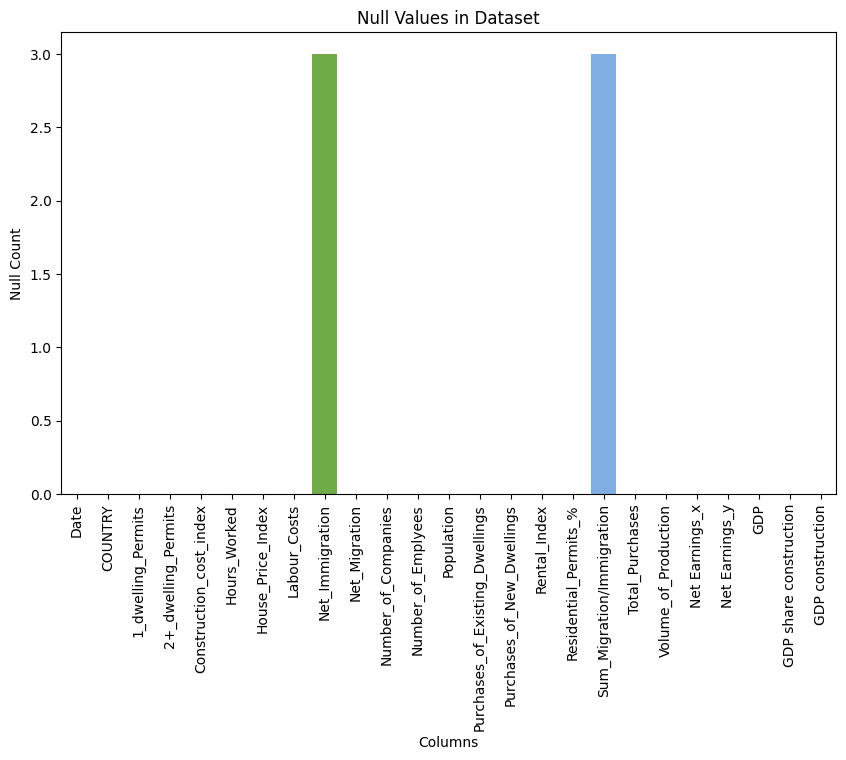

"\nplt.figure(figsize=(10, 6))\nsns.heatmap(df_loc.isnull(), cmap='viridis', cbar=False)\nplt.title('Null Values Heatmap')\nplt.show()\n"

In [102]:


# Create a bar plot showing the count of null values in each column
null_counts = df_loc.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Null Count')
plt.title('Null Values in Dataset')
plt.show()

# Create a heatmap to visualize the null values
"""
plt.figure(figsize=(10, 6))
sns.heatmap(df_loc.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()
"""

In [103]:
null_values = df_loc[df_loc['Net_Immigration'].isnull()]
null_values

,Date,COUNTRY,1_dwelling_Permits,2+_dwelling_Permits,Construction_cost_index,Hours_Worked,House_Price_Index,Labour_Costs,Net_Immigration,Net_Migration,...,Rental_Index,Residential_Permits_%,Sum_Migration/Immigration,Total_Purchases,Volume_of_Production,Net Earnings_x,Net Earnings_y,GDP,GDP share construction,GDP construction
0,2010,DENMARK,87.5,50.8,89.6,104.0,100.0,96.9,NaN,49734.0,...,89.40,66.6,NaN,90.6575,88.8,17367.89,17367.89,238567.0,4.4,10496.948
1,2010,IRELAND,113.2,246.0,99.3,82.6,100.0,85.8,NaN,-25760.0,...,79.80,141.7,NaN,105.9450,94.7,19457.01,19457.01,197047.0,1.5,2955.705
2,2010,SWEDEN,92.2,43.4,90.3,85.2,100.0,72.4,NaN,16847.0,...,90.28,56.9,NaN,73.9650,87.0,15477.55,15477.55,395981.0,5.7,22570.917


In [41]:
# Sort the DataFrame by the time component
df_loc = df_loc.sort_values('Date')

# Forward fill (carry forward) missing values
df_filled_forward = df_loc.ffill()

# Backward fill (carry backward) missing values
df_filled_backward = df_loc.bfill()

# Linear interpolation to fill missing values
df_filled_interpolation = df_loc.interpolate()

df_filled_backward.isnull().sum()

Date                               0
COUNTRY                            0
1_dwelling_Permits                 0
2+_dwelling_Permits                0
Construction_cost_index            0
Hours_Worked                       0
House_Price_Index                  0
Labour_Costs                       0
Net_Immigration                    0
Net_Migration                      0
Number_of_Companies                0
Number_of_Emplyees                 0
Population                         0
Purchases_of_Existing_Dwellings    0
Purchases_of_New_Dwellings         0
Rental_Index                       0
Residential_Permits_%              0
Sum_Migration/Immigration          0
Total_Purchases                    0
Volume_of_Production               0
Net Earnings                       0
dtype: int64

In [42]:

df_loc = df_filled_backward

# Statistics

In [43]:
df_loc.describe()

,Date,1_dwelling_Permits,2+_dwelling_Permits,Construction_cost_index,Hours_Worked,House_Price_Index,Labour_Costs,Net_Immigration,Net_Migration,Number_of_Companies,Number_of_Emplyees,Population,Purchases_of_Existing_Dwellings,Purchases_of_New_Dwellings,Rental_Index,Residential_Permits_%,Sum_Migration/Immigration,Total_Purchases,Volume_of_Production,Net Earnings
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2015.000000,105.736364,148.345455,100.706061,104.048485,114.712424,106.490909,115392.000000,32674.151515,60974.757576,185591.515152,6.726894e+06,101.301212,98.744242,100.197879,114.287879,150961.242424,101.754773,104.078788,18719.993333
std,3.211308,37.818711,177.253865,5.724342,17.374463,24.068115,23.556758,21410.024696,34839.669252,27858.169635,101262.401637,2.246951e+06,18.517472,22.326566,12.116642,66.149517,22327.942263,18.038600,16.746880,1377.386258
min,2010.000000,52.600000,28.100000,89.600000,73.000000,71.760000,72.400000,91240.000000,-27171.000000,30707.000000,55736.000000,4.549428e+06,71.915000,40.482500,79.800000,47.900000,106774.000000,73.965000,77.000000,15477.550000
25%,2012.000000,77.900000,50.800000,97.100000,94.000000,100.000000,89.300000,98436.000000,13406.000000,33306.000000,106047.000000,4.830392e+06,87.105000,89.537500,92.400000,63.500000,141598.000000,88.402500,91.800000,17836.310000
50%,2015.000000,100.000000,100.000000,100.000000,104.000000,110.300000,100.300000,107470.000000,24923.000000,51568.000000,158884.000000,5.659715e+06,100.022500,99.995000,100.000000,100.000000,147811.000000,99.995000,100.000000,18632.530000
75%,2018.000000,123.500000,140.200000,104.900000,110.300000,127.200000,121.900000,128136.000000,49734.000000,93598.000000,288820.000000,9.482855e+06,114.900000,112.775000,104.700000,135.100000,155937.000000,115.425000,114.800000,19457.010000
max,2020.000000,194.800000,882.700000,112.100000,145.500000,165.100000,161.800000,166098.000000,117693.000000,104097.000000,363845.000000,1.032759e+07,134.800000,132.525000,130.100000,324.800000,209449.000000,134.825000,144.800000,22142.750000


<ipython-input-44-93a2ad8f2dd7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_loc.corr()


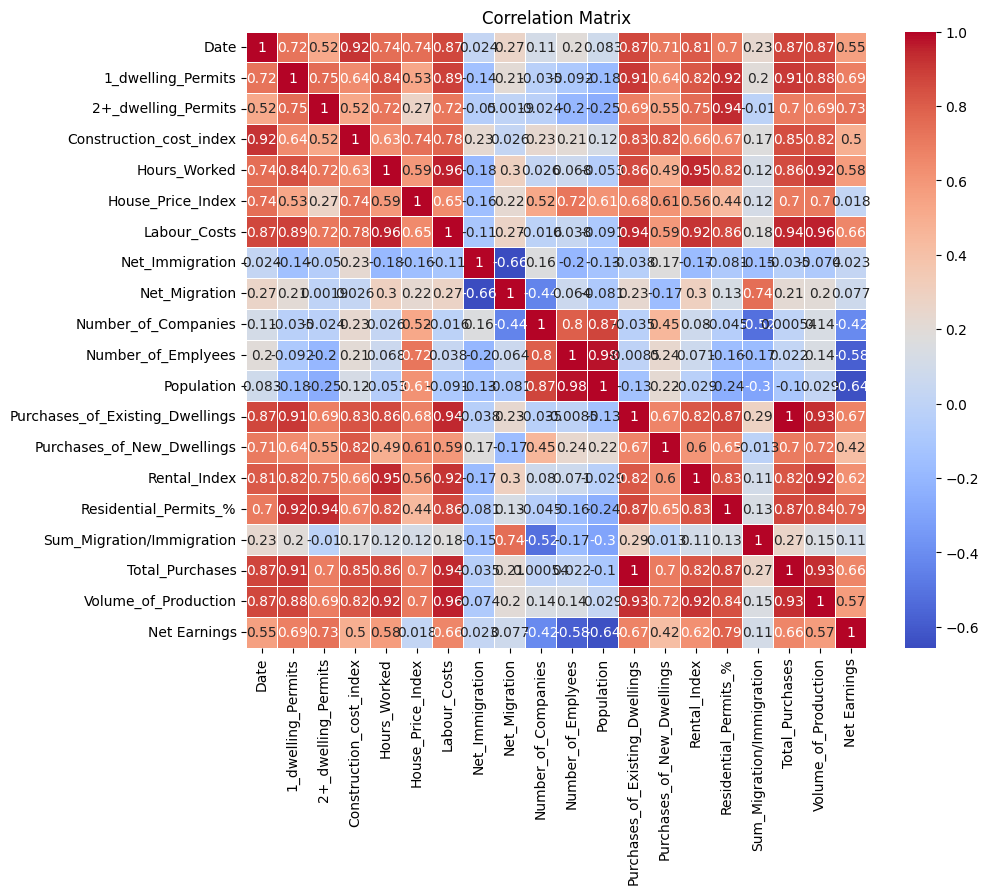

In [44]:
correlation_matrix = df_loc.corr()

# Create a correlation matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Confidence Interval for Population Proportion of Yearly Apartment Builds out of All Home Builds:

We are going to calculate the confidence interval for the population proportion of yearly apartment builds out of all home builds. To do this, we are considering the "1_dwelling_Permits" and "2+_dwelling_Permits" columns. For instance, the proportion for Denmark in 2014 would be calculated by adding the number of "1_dwelling_Permits" and "2+_dwelling_Permits" and dividing by the total. By collecting these proportions for each country and year, you can then calculate a confidence interval to estimate the population proportion.

In [45]:
df_loc['Proportion_Apartment_Builds'] = df_loc['2+_dwelling_Permits'] / (df_loc['1_dwelling_Permits'] + df_loc['2+_dwelling_Permits'])



# Number of observations
n = len(df_loc)

# Sample proportion
p_hat = df_loc['Proportion_Apartment_Builds'].mean()

# Z-value for 95% confidence
z = stats.norm.ppf(0.975)

# Standard error
se = np.sqrt((p_hat * (1 - p_hat)) / n)

# Confidence interval
conf_interval = [p_hat - z * se, p_hat + z * se]

print('95% confidence interval for the population proportion of yearly apartment builds out of all home builds:', conf_interval)



95% confidence interval for the population proportion of yearly apartment builds out of all home builds: [0.3337859446502812, 0.674958835142711]


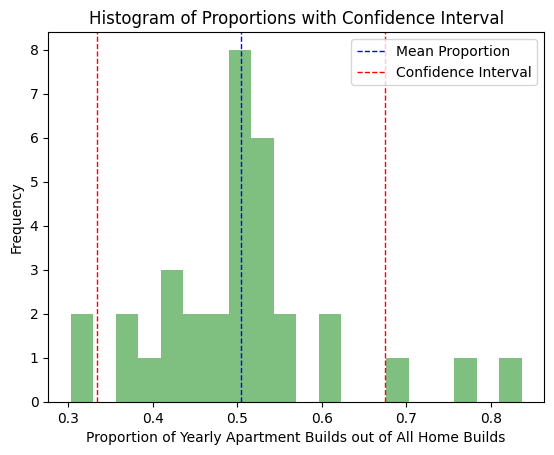

In [46]:

# Calculate the proportions
#proportions = df['2+_dwelling_Permits'] / (df['1_dwelling_Permits'] + df['2+_dwelling_Permits'])

# Create a histogram of the proportions
plt.hist(df_loc['Proportion_Apartment_Builds'], bins=20, alpha=0.5, color='g')

# Add a vertical line for the mean proportion
plt.axvline(p_hat, color='blue', linestyle='dashed', linewidth=1)

# Add vertical lines for the confidence interval
plt.axvline(conf_interval[0], color='red', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval[1], color='red', linestyle='dashed', linewidth=1)

# Add a legend
plt.legend(['Mean Proportion', 'Confidence Interval'])

# Add labels and title
plt.xlabel('Proportion of Yearly Apartment Builds out of All Home Builds')
plt.ylabel('Frequency')
plt.title('Histogram of Proportions with Confidence Interval')

# Show the plot
plt.show()


## Hypothesis Testing for the Mean of Construction Costs t-test

**H0**: "There is no difference between the mean Construction_cost_index for Denmark and Ireland." 

**H1**: "There is a difference between the mean Construction_cost_index for Denmark and Ireland."

In [89]:
denmark_data = df_loc[df_loc['COUNTRY'] == 'DENMARK']['Construction_cost_index']
ireland_data = df_loc[df_loc['COUNTRY'] == 'IRELAND']['Construction_cost_index']



t_statistic, p_value = stats.ttest_ind(denmark_data, ireland_data)


alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


We fail to reject the null hypothesis


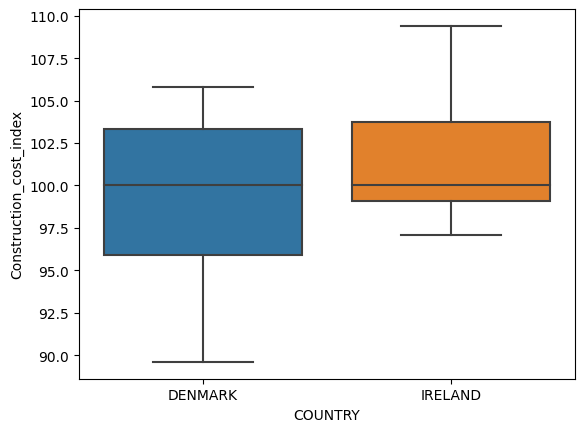

In [90]:


# Filter only Denmark and Ireland data
df_filtered = df_loc[df_loc['COUNTRY'].isin(['DENMARK', 'IRELAND'])]

# Create box plots
sns.boxplot(x='COUNTRY', y='Construction_cost_index', data=df_filtered)

# Show the plot
plt.show()


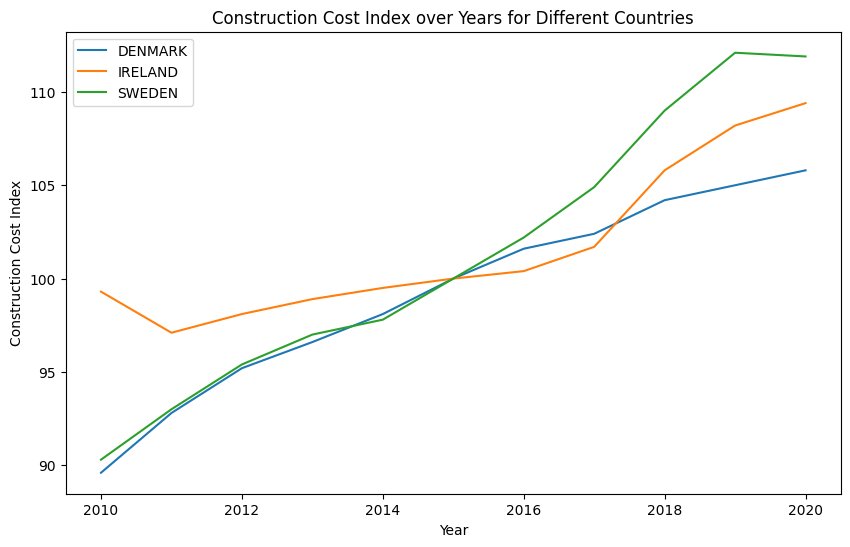

In [92]:

plt.figure(figsize=(10,6))

# List of countries in your dataset
countries = df_loc['COUNTRY'].unique()

for country in countries:
    country_data = df_loc[df_loc['COUNTRY'] == country]
    plt.plot(country_data['Date'], country_data['Construction_cost_index'], label=country)

plt.xlabel('Year')
plt.ylabel('Construction Cost Index')
plt.title('Construction Cost Index over Years for Different Countries')
plt.legend()
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00


In [ ]:


# Load your dataset into a pandas DataFrame
#df = pd.read_csv('your_dataset.csv')

# Iterate through each column for change point detection
for column_name in df_loc.columns:
    if df_loc[column_name].dtype != np.number:
        continue  # Skip non-numeric columns

    data = df_loc[column_name].values

    # Perform change point detection using Pelt algorithm
    model = "l2"  # l2-norm as the cost function
    algo = rpt.Pelt(model=model).fit(data)
    result = algo.predict(pen=10)  # Change point prediction with penalty parameter

    # Plot the change points
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    for cp in result:
        plt.axvline(x=cp, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title(f'Change Point Detection - {column_name}')
    plt.show()


In [ ]:
# Filter the DataFrame for the "Country" column equals "Ireland"
filtered_df = df_loc[df_loc['COUNTRY'] == 'IRELAND']

# Iterate through each column for change point detection
for column_name in filtered_df.columns:
    if filtered_df[column_name].dtype != np.number:
        continue  # Skip non-numeric columns

    data = filtered_df[column_name].values

    # Perform change point detection using Pelt algorithm
    model = "l2"  # l2-norm as the cost function
    algo = rpt.Pelt(model=model).fit(data)
    result = algo.predict(pen=10)  # Change point prediction with penalty parameter

    # Plot the change points
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    for cp in result:
        plt.axvline(x=cp, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title(f'Change Point Detection - {column_name} (Ireland)')
    plt.show()

<ipython-input-100-f825bf79f639>:8: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df_ireland[column_name].dtype != np.number:


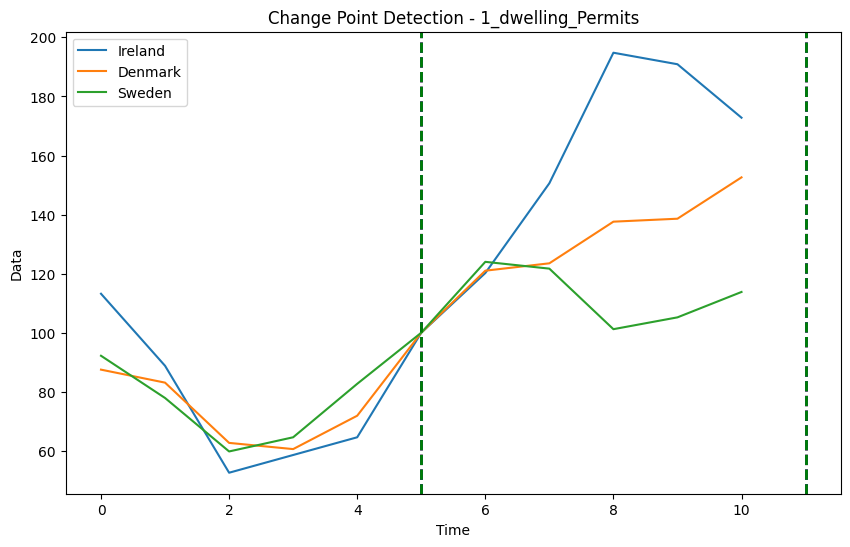

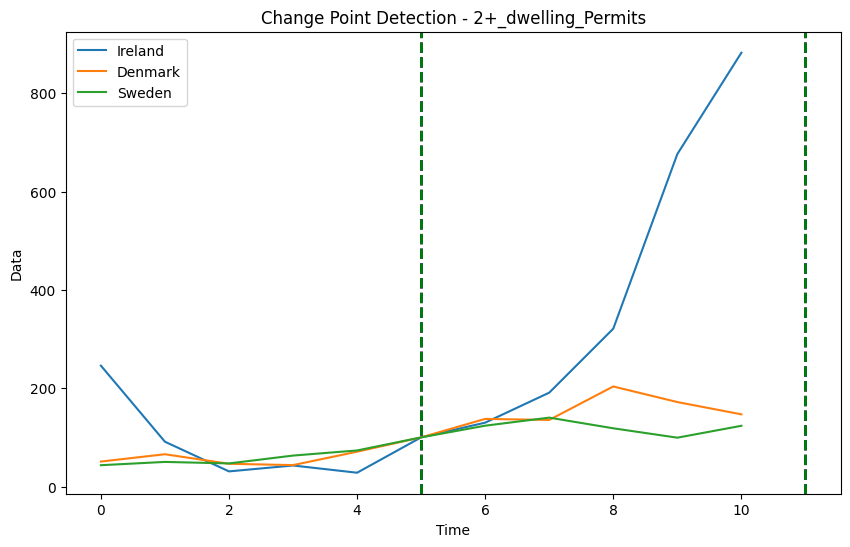

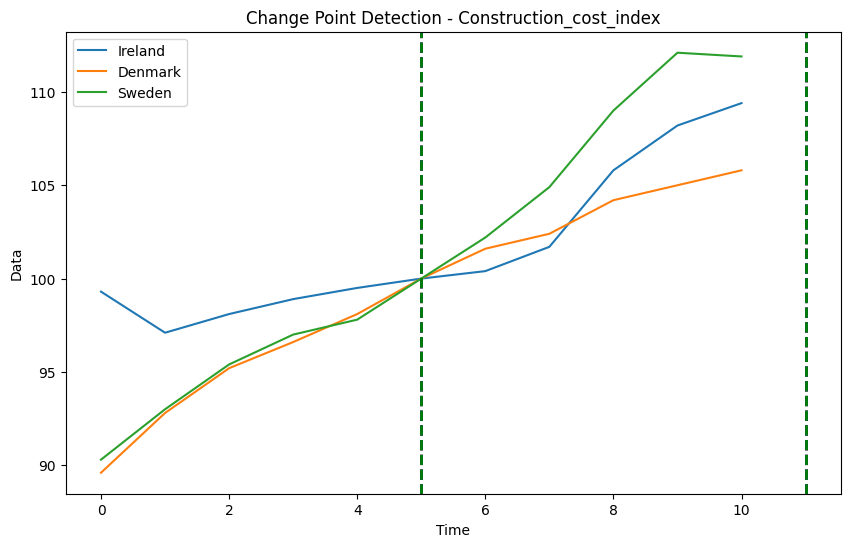

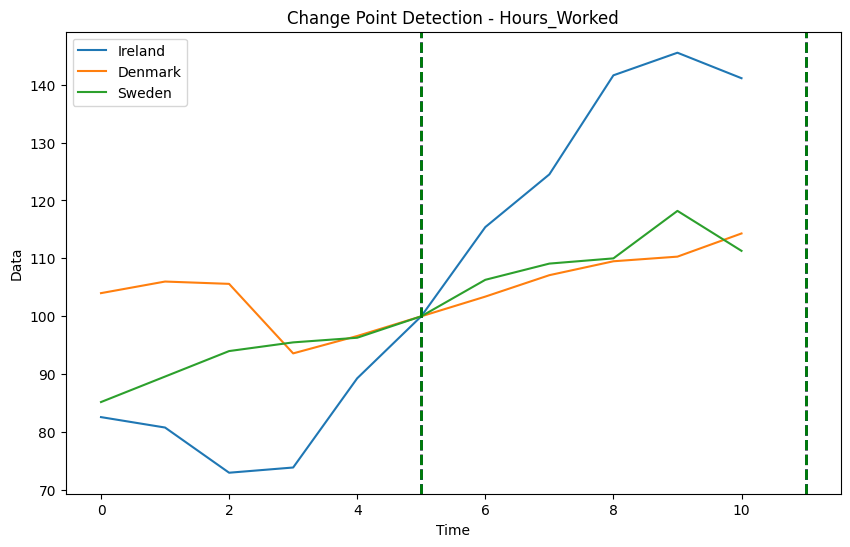

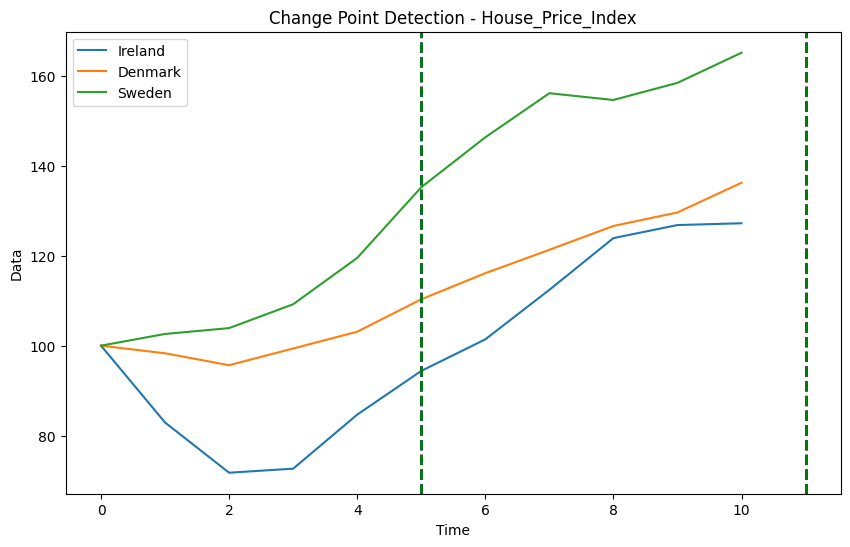

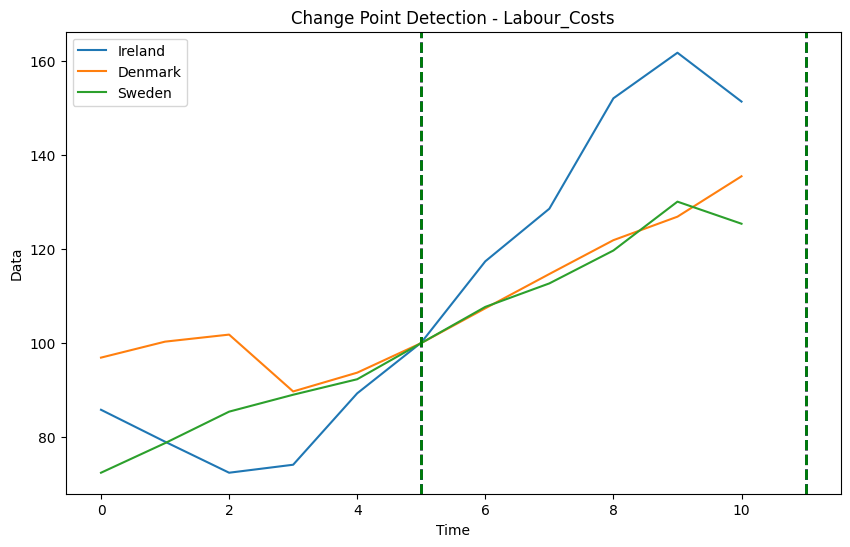

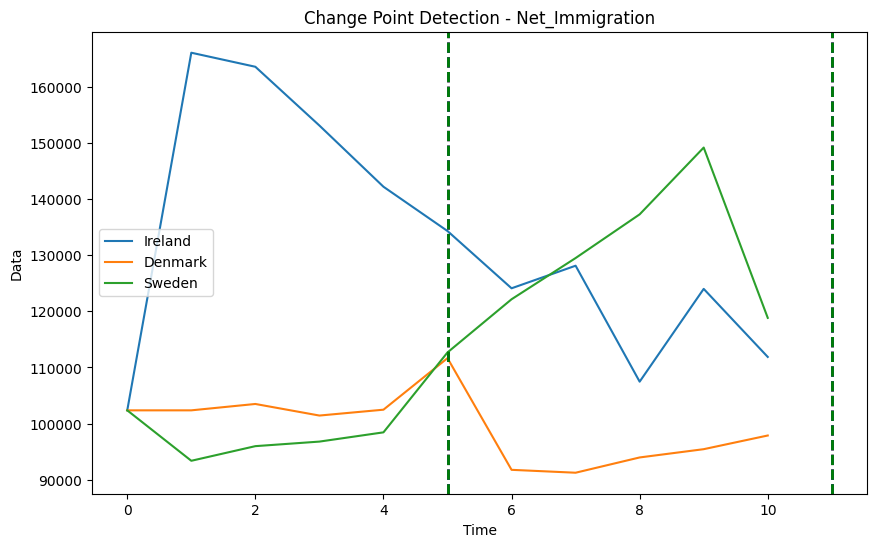

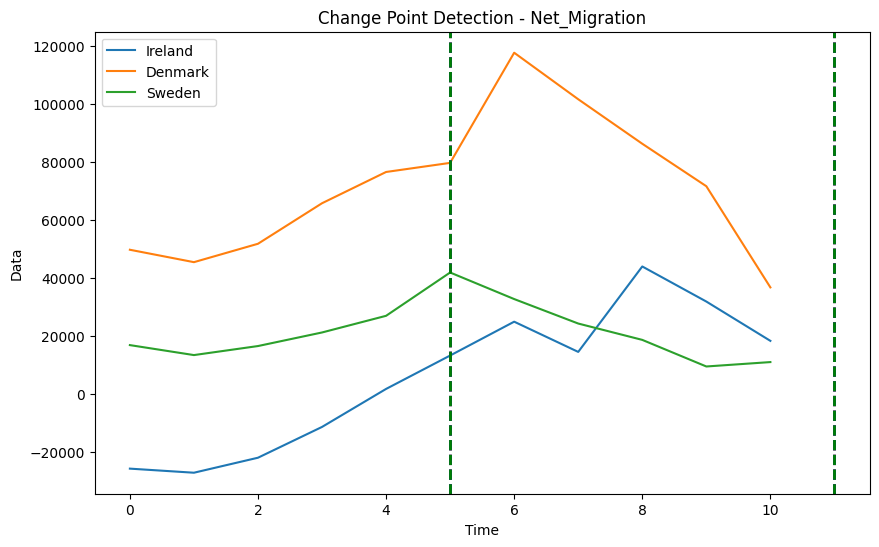

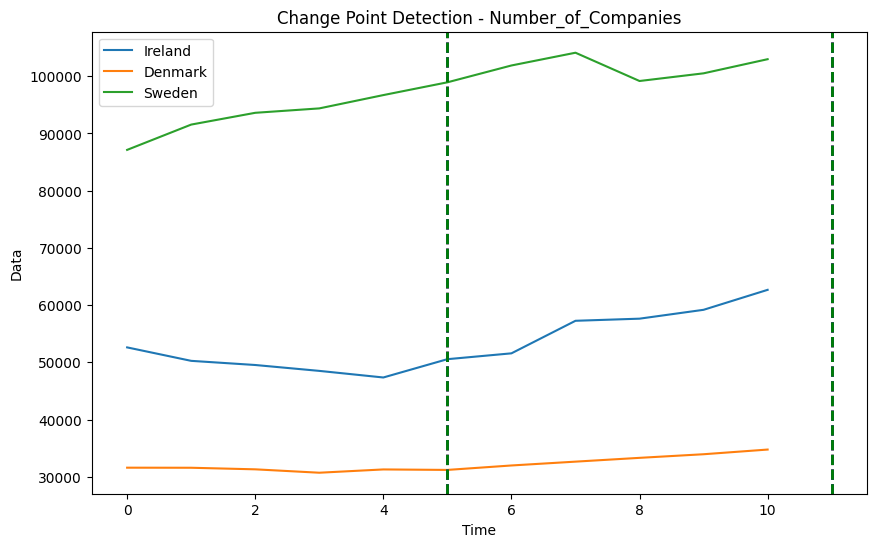

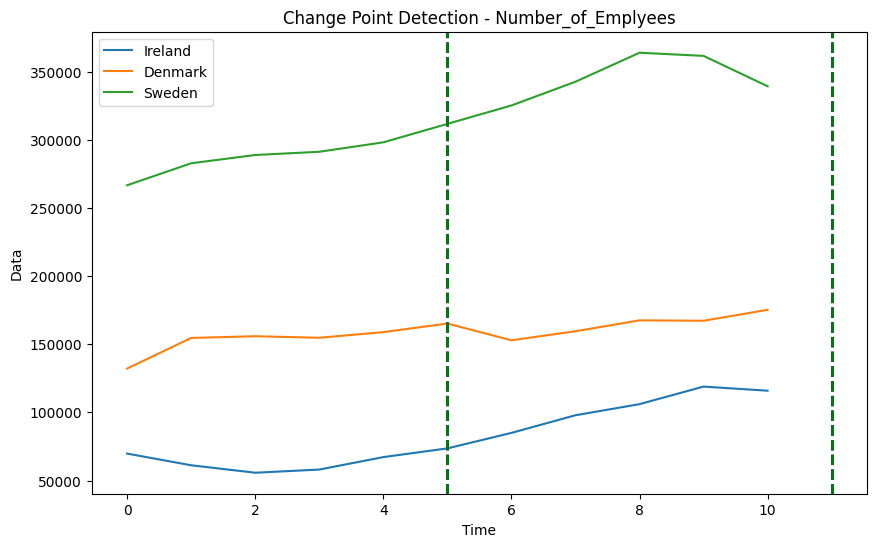

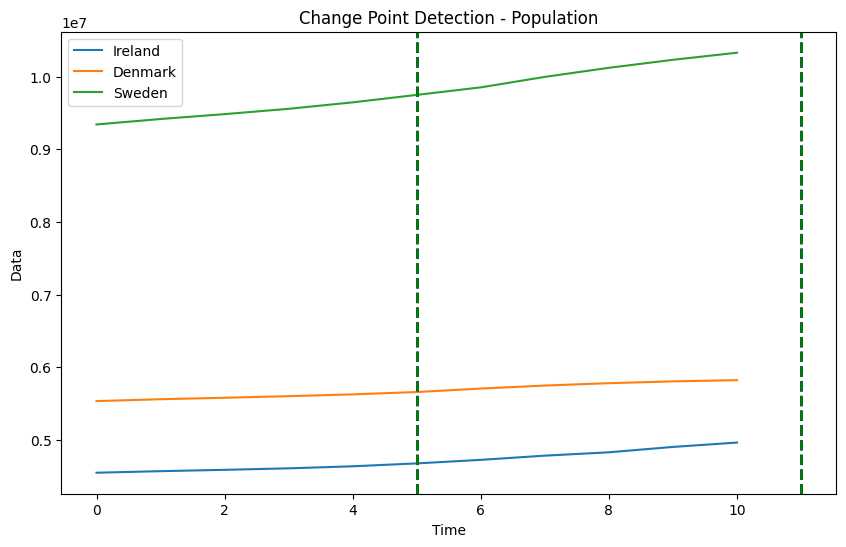

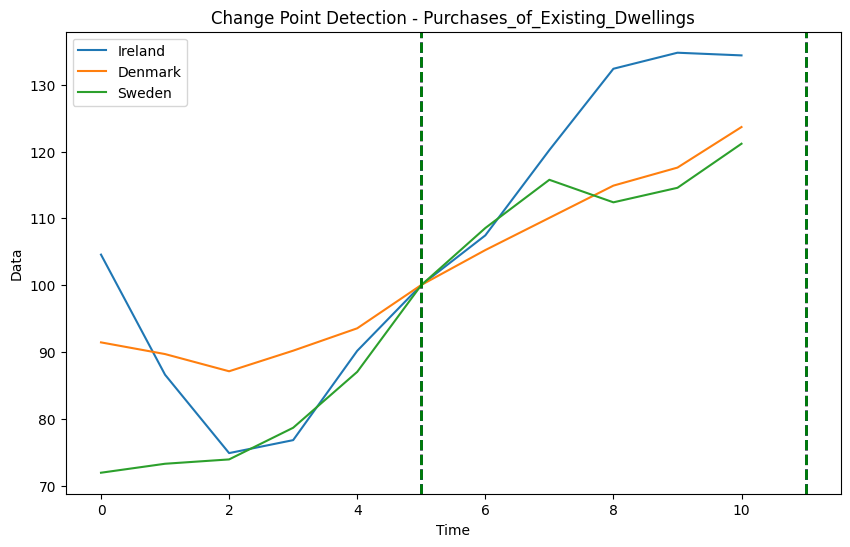

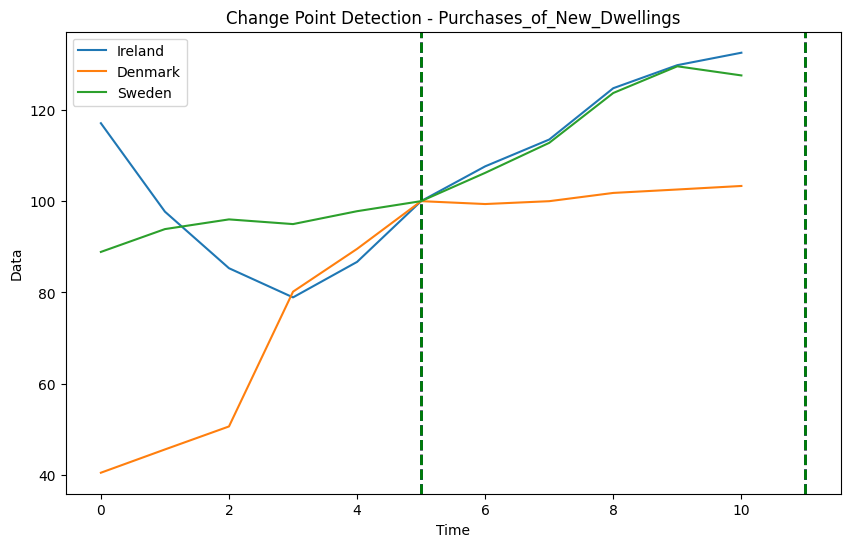

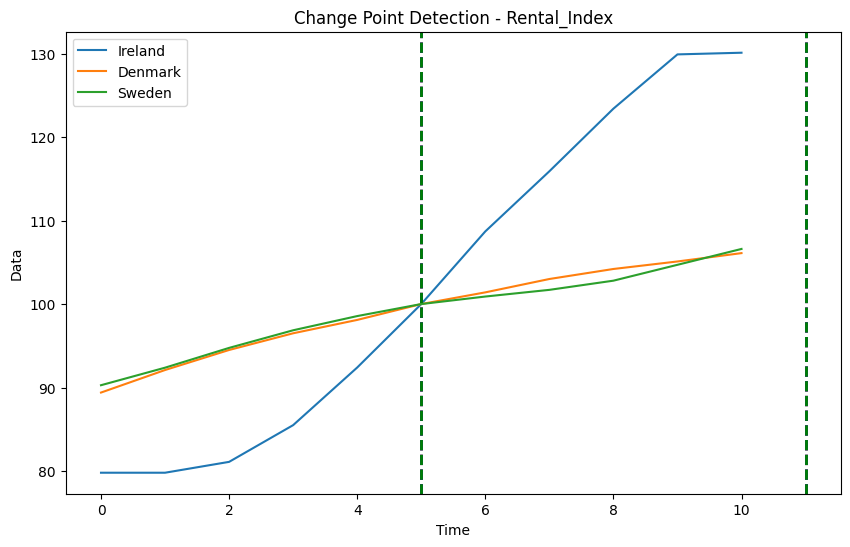

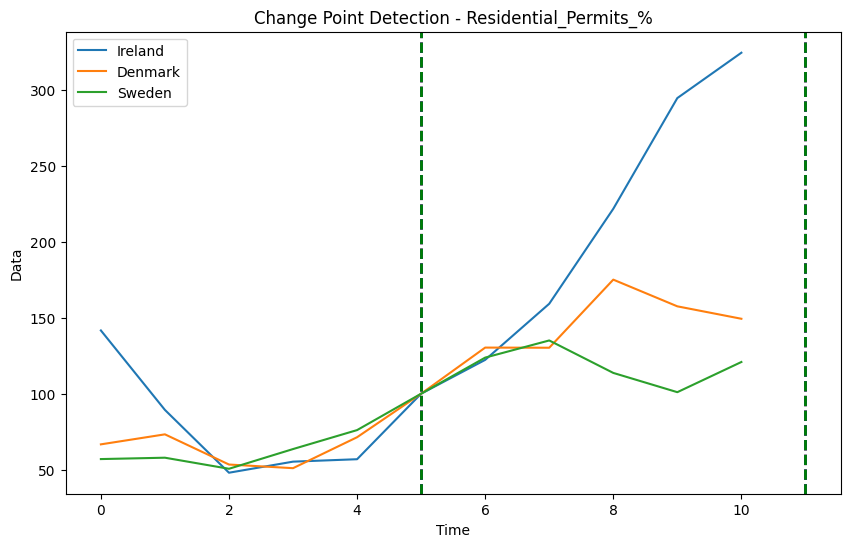

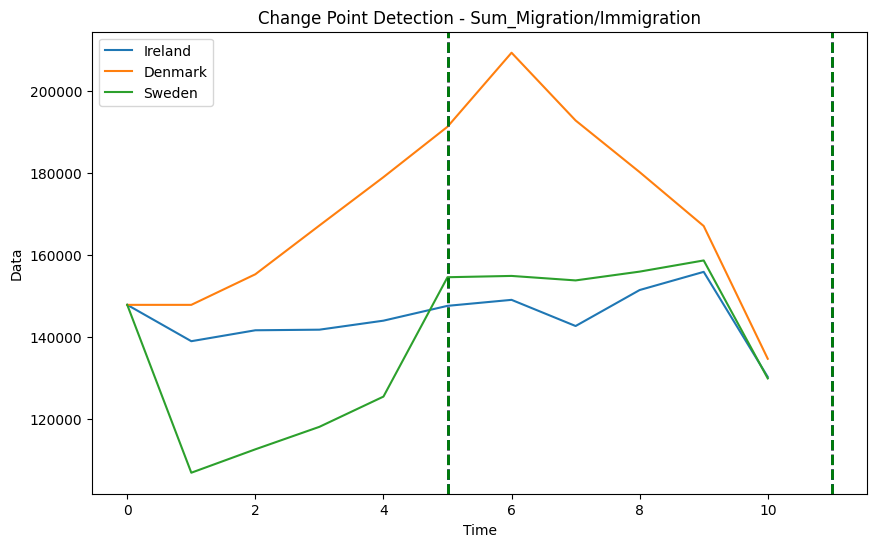

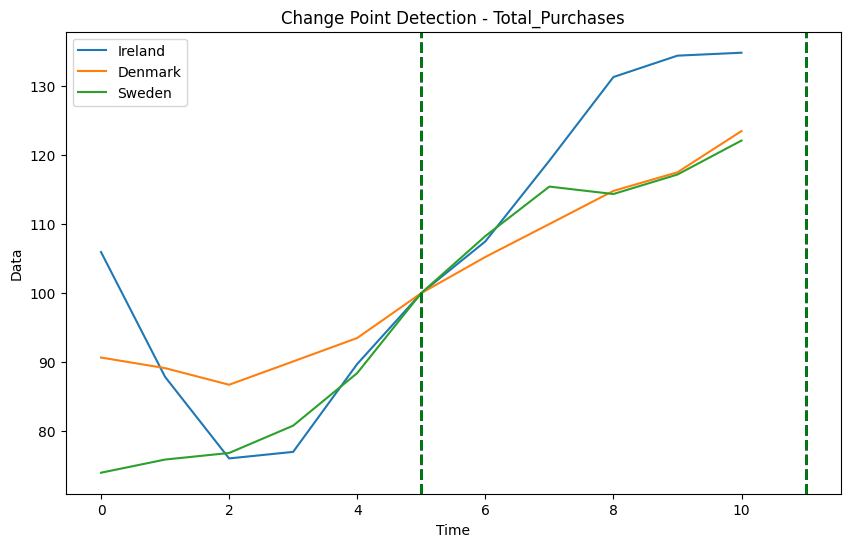

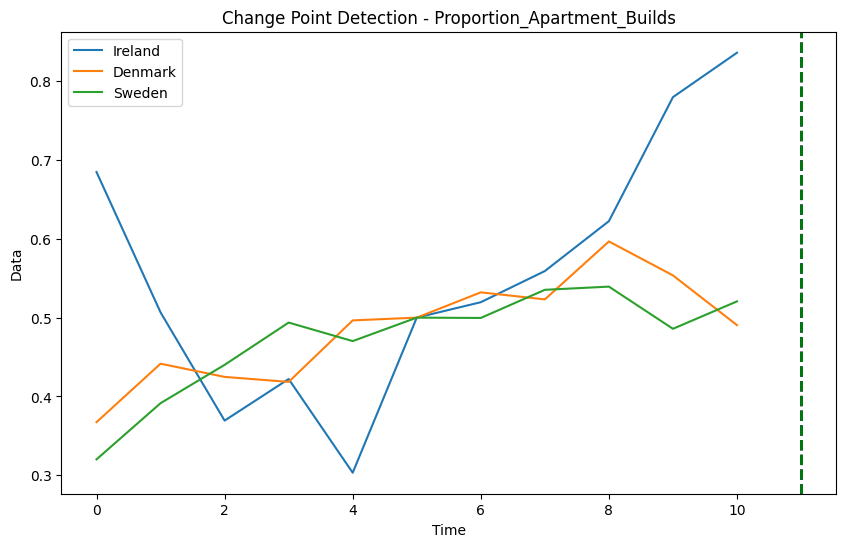

In [100]:
# Filter the DataFrame for each country
df_ireland = df_loc[df_loc['COUNTRY'] == 'IRELAND']
df_denmark = df_loc[df_loc['COUNTRY'] == 'DENMARK']
df_sweden = df_loc[df_loc['COUNTRY'] == 'SWEDEN']

# Iterate through each column for change point detection
for column_name in df_ireland.columns:
    if df_ireland[column_name].dtype != np.number:
        continue  # Skip non-numeric columns

    # Get the data for each country
    data_ireland = df_ireland[column_name].values
    data_denmark = df_denmark[column_name].values
    data_sweden = df_sweden[column_name].values

    # Perform change point detection using Pelt algorithm for each country
    model = "l2"  # l2-norm as the cost function

    # Ireland
    algo_ireland = rpt.Pelt(model=model).fit(data_ireland)
    result_ireland = algo_ireland.predict(pen=10)  # Change point prediction with penalty parameter

    # Denmark
    algo_denmark = rpt.Pelt(model=model).fit(data_denmark)
    result_denmark = algo_denmark.predict(pen=10)  

    # Sweden
    algo_sweden = rpt.Pelt(model=model).fit(data_sweden)
    result_sweden = algo_sweden.predict(pen=10)  

    # Plot the change points
    plt.figure(figsize=(10, 6))

    # Plot data and change points for each country
    plt.plot(data_ireland, label='Ireland')
    for cp in result_ireland:
        plt.axvline(x=cp, color='r', linestyle='--', linewidth=2)

    plt.plot(data_denmark, label='Denmark')
    for cp in result_denmark:
        plt.axvline(x=cp, color='b', linestyle='--', linewidth=2)

    plt.plot(data_sweden, label='Sweden')
    for cp in result_sweden:
        plt.axvline(x=cp, color='g', linestyle='--', linewidth=2)

    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title(f'Change Point Detection - {column_name}')
    plt.legend()
    plt.show()


## Regression Analysis for the Impact of Various Factors on House Price Index

In [ ]:


df_ireland = df_loc[df_loc['COUNTRY'] == 'IRELAND']
df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits'] 
# Specifing the model
X = df_ireland[["Construction_cost_index", "Labour_Costs", "Net_Immigration", "Number_of_Companies", 'Total_Purchases','Total Permits', 'Population', 'Net Earnings']]
X = sm.add_constant(X)  # adding a constant
y = df_ireland["House_Price_Index"]

# Fitting the model
model = sm.OLS(y, X)
results = model.fit()

# results
print(results.summary())

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [51]:
df_ireland = df_loc[df_loc['COUNTRY'] == 'IRELAND']
df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits']


# Select columns to check for outliers
cols_to_check = ["Construction_cost_index", "Labour_Costs", "Net_Immigration", "Number_of_Companies", 'Total_Purchases','Total Permits', 'Population', 'Net Earnings', 'House_Price_Index']

# Compute Z-scores
z_scores = np.abs(stats.zscore(df_ireland[cols_to_check]))

# Define a threshold to identify outliers
threshold = 3

# Get a boolean mask where true values are outliers
outliers = (z_scores > threshold).any(axis=1)

# Get the dataframe with only non-outliers
df_no_outliers = df_ireland[~outliers]


<ipython-input-51-576548b38ea3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits']


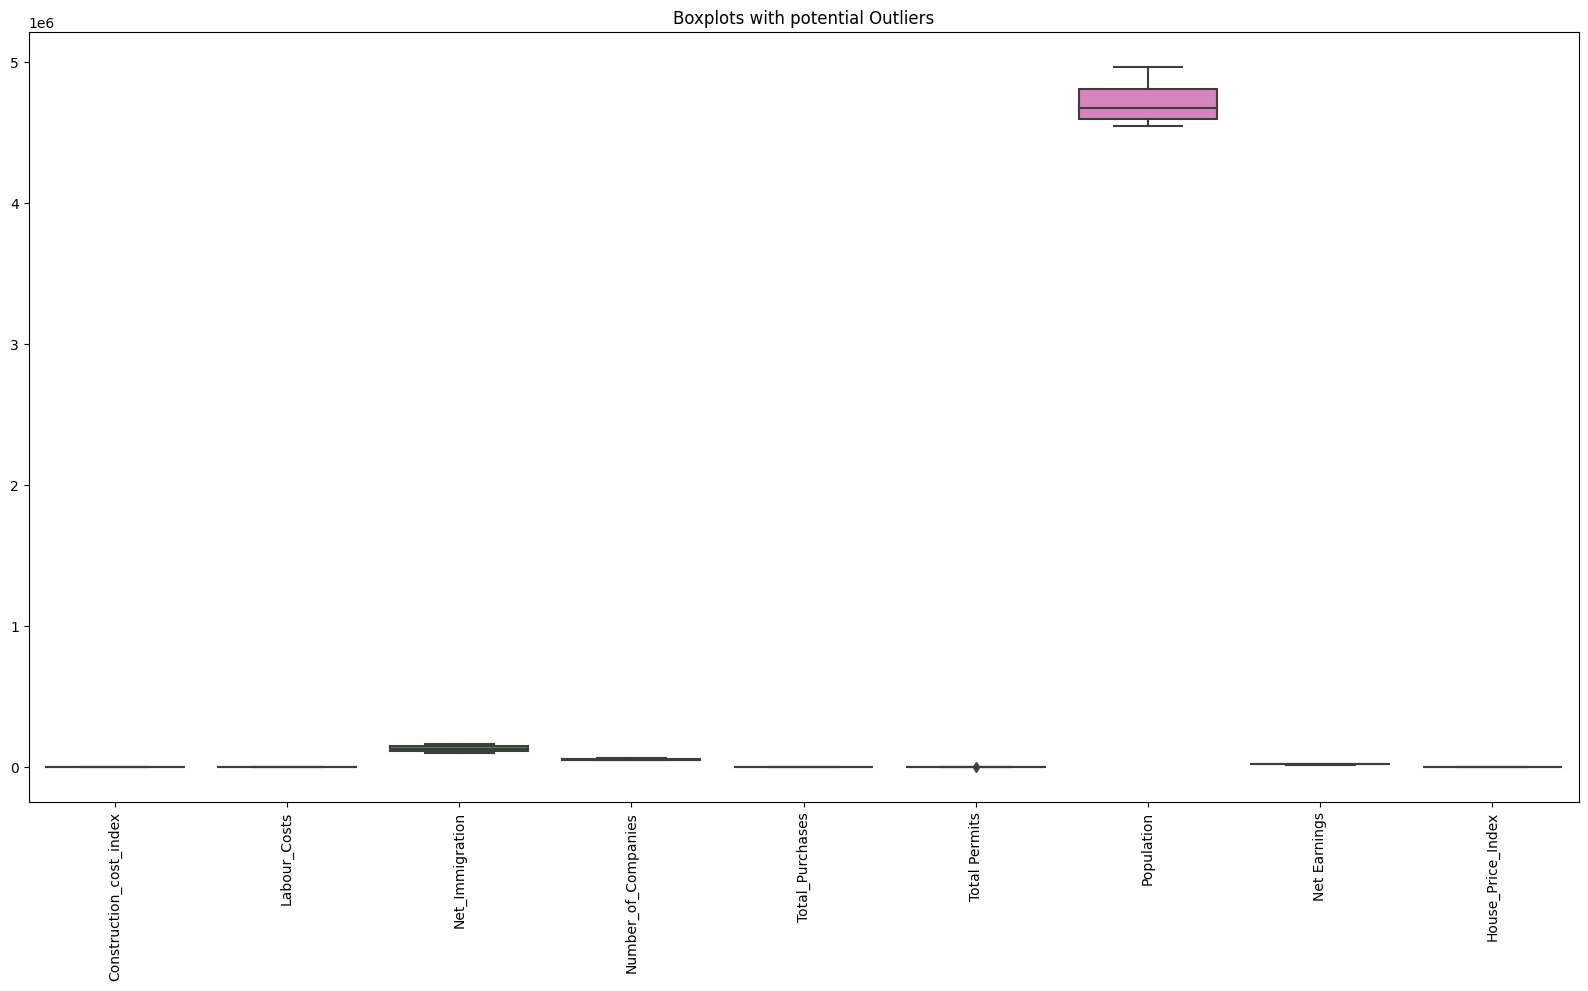

In [53]:
# Plotting boxplots
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_no_outliers[cols_to_check])
plt.xticks(rotation=90)
plt.title("Boxplots with potential Outliers")
plt.show()

In [54]:
df_ireland = df_loc[df_loc['COUNTRY'] == 'IRELAND']
df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits'] 
# Specifing the model
X = df_ireland[["Construction_cost_index", "Labour_Costs", "Net_Immigration", "Number_of_Companies", 'Total_Purchases','Total Permits', 'Population', 'Net Earnings']]
X = sm.add_constant(X)  # adding a constant
y = df_ireland["House_Price_Index"]

# Fitting the model
model = sm.OLS(y, X)
results = model.fit()

# results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      House_Price_Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.005e+05
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.43e-06
Time:                        23:31:30   Log-Likelihood:                 33.232
No. Observations:                  11   AIC:                            -48.46
Df Residuals:                       2   BIC:                            -44.88
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<ipython-input-54-12edc906bdcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits']
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [55]:
df_ireland = df_loc[df_loc['COUNTRY'] == 'IRELAND']
df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits'] 
# Specifing the model
X = df_no_outliers[["Construction_cost_index", "Labour_Costs", "Net_Immigration", "Number_of_Companies", 'Total_Purchases','Total Permits', 'Population', 'Net Earnings']]
X = sm.add_constant(X)  # adding a constant
y = df_no_outliers["House_Price_Index"]

# Fitting the model
model = sm.OLS(y, X)
results = model.fit()

# results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      House_Price_Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.005e+05
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.43e-06
Time:                        23:31:54   Log-Likelihood:                 33.232
No. Observations:                  11   AIC:                            -48.46
Df Residuals:                       2   BIC:                            -44.88
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<ipython-input-55-beec1c996faa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits']
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [109]:
df_loc.columns

Index(['Date', 'COUNTRY', '1_dwelling_Permits', '2+_dwelling_Permits',
       'Construction_cost_index', 'Hours_Worked', 'House_Price_Index',
       'Labour_Costs', 'Net_Immigration', 'Net_Migration',
       'Number_of_Companies', 'Number_of_Emplyees', 'Population',
       'Purchases_of_Existing_Dwellings', 'Purchases_of_New_Dwellings',
       'Rental_Index', 'Residential_Permits_%', 'Sum_Migration/Immigration',
       'Total_Purchases', 'Proportion_Apartment_Builds'],
      dtype='object')

In [160]:

data = df_loc
data.fillna(data.mean(), inplace=True)
# Select relevant features based on domain knowledge
relevant_features = ['Construction_cost_index', 'House_Price_Index', 'Population']
string_columns = ['Date', 'COUNTRY', 'House_Price_Index']
# Alternatively, use feature importance techniques (e.g., random forest feature importance)


# Separate the features and target variable
X = data.drop(columns=string_columns, axis=1)  # Features
y = data['House_Price_Index']  # Target variable

# Fit a random forest model to calculate feature importances
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Select top 'k' features with highest importance
k = 6
top_features_indices = feature_importances.argsort()[-k:][::-1]
top_features = X.columns[top_features_indices].tolist()
print(top_features_indices)
print(top_features)

[ 2 15  9 12  8  5]
['Construction_cost_index', 'Total_Purchases', 'Population', 'Rental_Index', 'Number_of_Emplyees', 'Net_Immigration']


<ipython-input-160-ea786f70d8d3>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [161]:


# Assuming 'X' contains the top features and 'y' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regression models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
neural_network = MLPRegressor()

# Train the models
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
neural_network.fit(X_train, y_train)

# Make predictions on the test set
linear_pred = linear_regression.predict(X_test)
tree_pred = decision_tree.predict(X_test)
forest_pred = random_forest.predict(X_test)
boosting_pred = gradient_boosting.predict(X_test)
nn_pred = neural_network.predict(X_test)

# Evaluate model performance
linear_mse = mean_squared_error(y_test, linear_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
forest_mse = mean_squared_error(y_test, forest_pred)
boosting_mse = mean_squared_error(y_test, boosting_pred)
nn_mse = mean_squared_error(y_test, nn_pred)

linear_r2 = r2_score(y_test, linear_pred)
tree_r2 = r2_score(y_test, tree_pred)
forest_r2 = r2_score(y_test, forest_pred)
boosting_r2 = r2_score(y_test, boosting_pred)
nn_r2 = r2_score(y_test, nn_pred)

# Print the performance metrics
print("Linear Regression - MSE: {:.4f}, R^2: {:.4f}".format(linear_mse, linear_r2))
print("Decision Tree - MSE: {:.4f}, R^2: {:.4f}".format(tree_mse, tree_r2))
print("Random Forest - MSE: {:.4f}, R^2: {:.4f}".format(forest_mse, forest_r2))
print("Gradient Boosting - MSE: {:.4f}, R^2: {:.4f}".format(boosting_mse, boosting_r2))
print("Neural Network - MSE: {:.4f}, R^2: {:.4f}".format(nn_mse, nn_r2))


Linear Regression - MSE: 1.3717, R^2: 0.9963
Decision Tree - MSE: 289.7402, R^2: 0.2186
Random Forest - MSE: 96.8137, R^2: 0.7389
Gradient Boosting - MSE: 63.5609, R^2: 0.8286
Neural Network - MSE: 44073239955.7276, R^2: -118855961.4683


In [162]:
# Assuming you have selected the best regression model (e.g., random forest) and split the data into training and testing sets

# Fit the model on the training data
model.fit(X_train, y_train)

# Assuming you have trained the model and split the data into training and testing sets

# Make predictions on the test/validation data
y_pred = model.predict(X_test)

# Evaluate the model using appropriate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("R-squared (R^2): {:.4f}".format(r2))


Mean Squared Error (MSE): 106.9929
Root Mean Squared Error (RMSE): 10.3437
R-squared (R^2): 0.7115


<ipython-input-129-733e5724824c>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_loc.corr(method='pearson')


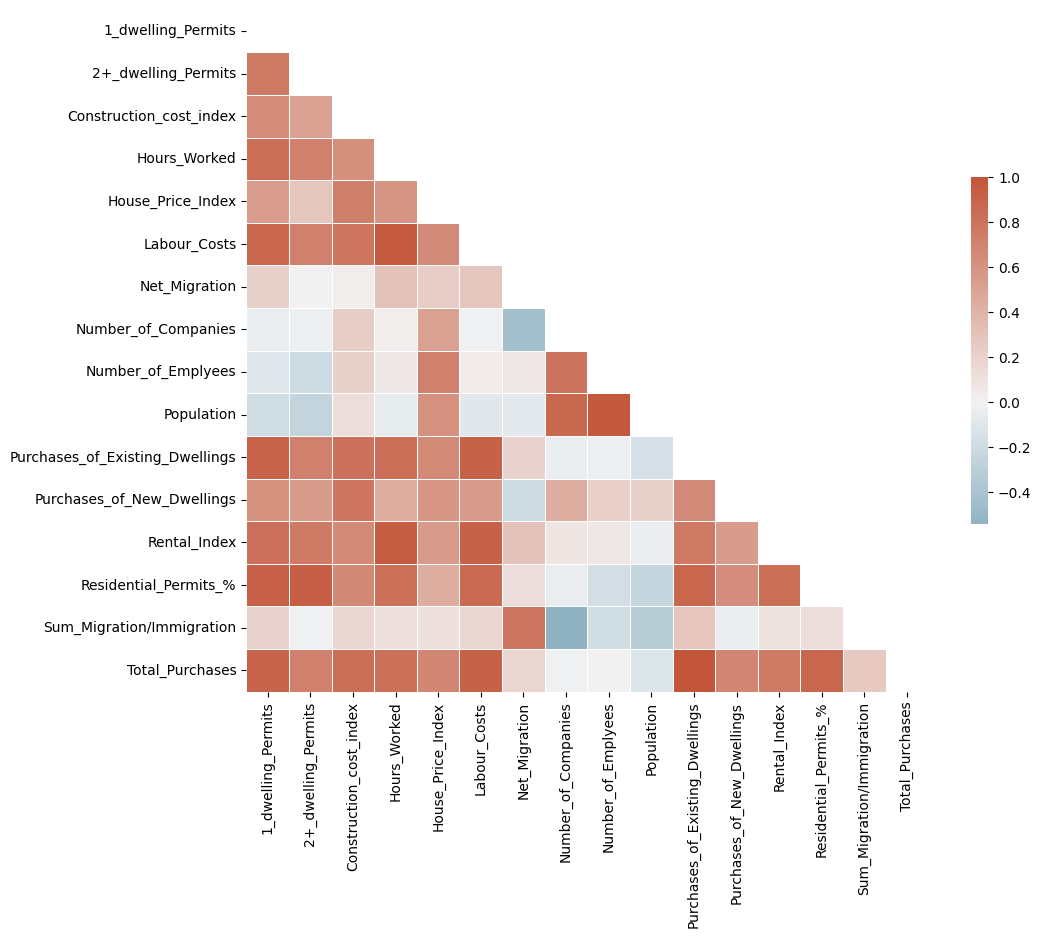

In [129]:


# Compute the correlation matrix
corr = df_loc.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()



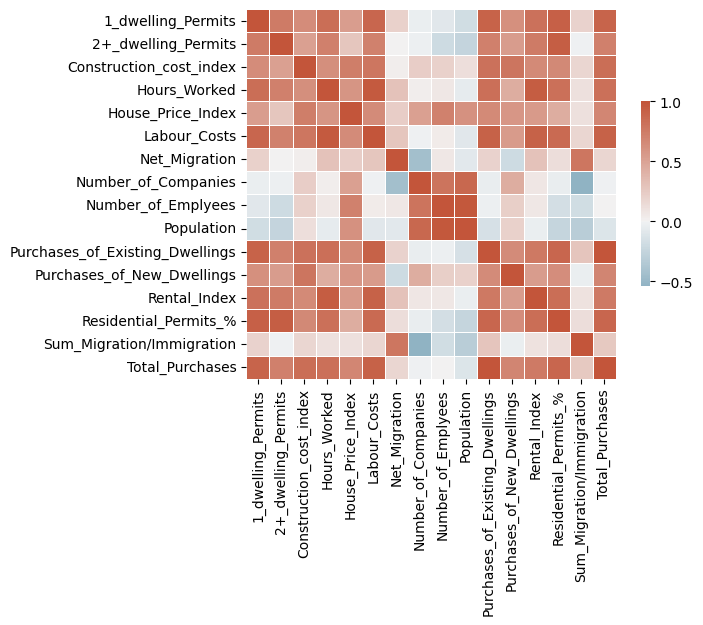

In [130]:
# Simple heatmap
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Display the plot
plt.show()


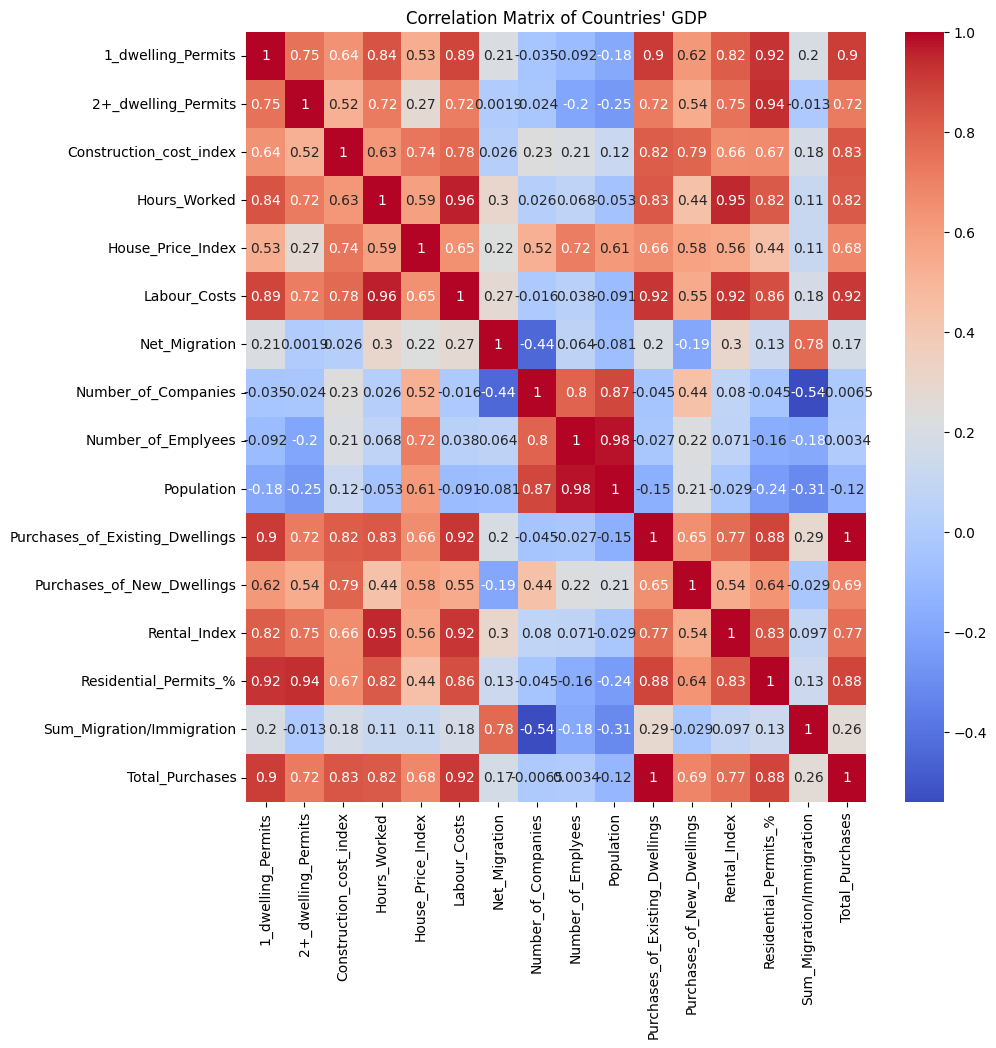

In [131]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Countries' GDP")
plt.show()

In [102]:
df_loc.isnull().sum()

Date                         0
COUNTRY                      0
1_dwelling_Permits           0
2+_dwelling_Permits          0
Construction_cost_index      0
Hours_Worked                 0
House_Price_Index            0
Labour_Costs                 0
Net_Migration                0
Number_of_Companies          0
Number_of_Emplyees           0
Population                   0
Rental_Index                 0
Residential_Permits_%        0
Sum_Migration/Immigration    3
dtype: int64

In [ ]:
merge_aux5.columns = merge_aux5.columns.str.replace('IRL', 'IRELAND').replace('PT', 'PORTUGAL').replace('RO', 'ROMANIA')
"""
melted_df = pd.melt(merge_aux5, id_vars='Date', var_name='Country', value_name='Value')
melted_df[['Country', 'Indicator']] = melted_df['Country'].str.split(' ', 1, expand=True)
pivoted_df = melted_df.pivot(index='Date', columns='Indicator', values='Value').reset_index()
pivoted_df.columns = ['Date', 'House Price Index IRELAND', 'House Price Index PORTUGAL',
       'House Price Index ROMANIA', 'Residential Permits IRL',
       'Residential Permits % IRL', '1 dwelling Permits IRL',
       '2+ dwelling Permits IRL', 'Residential Permits PT',
       'Residential Permits % PT', '1 dwelling Permits PT',
       '2+ dwelling Permits PT', 'Residential Permits RO',
       'Residential Permits % RO', 'Number of Companies IRELAND',
       'Number of Emplyees IRELAND', 'Number of Companies PORTUGAL',
       'Number of Emplyees PORTUGAL', 'Number of Companies ROMANIA',
       'Number of Emplyees ROMANIA', 'Construction cost index IRELAND',
       'Construction cost index PORTUGAL', 'Construction cost index ROMANIA',
       'Labour Costs IRELAND', 'Labour Costs PORTUGAL',
       'Labour Costs ROMANIA']
"""


<ipython-input-64-7a3c8f1fe9e6>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melted_df[['Country', 'Indicator']] = melted_df['Country'].str.split(' ', 1, expand=True)


ValueError: ignored

In [ ]:
dff_labourCosts = df_labourCosts[(df_labourCosts["Economic Sector NACE Rev 2"] == 'Construction (F)')
                                  & (df_labourCosts["Type of Employee"] == 'All employees')
                                  & (df_labourCosts["Statistic Label"] ==  'Average Hourly Earnings')])
dff_labourCosts['Quarter'] = dff_labourCosts['Quarter'].str.split('Q').str[0].astype(int)
dff_labourCosts['VALUE'] = dff_labourCosts['VALUE'].astype(float)
labourCosts_final = dff_labourCosts.groupby(['Quarter'])['VALUE'].mean().reset_index()


<ipython-input-26-18c7a441ba21>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_labourCosts['Quarter'] = dff_labourCosts['Quarter'].str.split('Q').str[0].astype(int)
<ipython-input-26-18c7a441ba21>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_labourCosts['VALUE'] = dff_labourCosts['VALUE'].astype(float)


,Quarter,VALUE
0,2008,20.0900
1,2009,20.9425
2,2010,20.1625
3,2011,19.0750
4,2012,19.3450
5,2013,19.5625
6,2014,19.5300
7,2015,19.5300
8,2016,19.8475
9,2017,20.1275


In [ ]:
new_df = pd.DataFrame()
import re

#housing prices
filtered_housingPrices = df_housingPrices[(df_housingPrices["Type of Dwelling"] == 'All Dwelling Types') 
                    & (df_housingPrices["Dwelling Status"] == 'All Dwelling Statuses') 
                    & (df_housingPrices["Sectoral Flow"] == 'All sectoral flow types') 
                    & (df_housingPrices["Type of Sale"] == 'All Sale Types')
                    & (df_housingPrices["Statistic Label"] == 'Mean Sale Price')]

housing_final = filtered_housingPrices.groupby('Year').mean().reset_index()

################################################################################################################################################################

#rent prices
dff_rentPrices = df_rentPrices[(df_rentPrices["Number of Bedrooms"] ==  'All bedrooms')
                                 & (df_rentPrices["Property Type"] ==  'All property types')]
dff_rentPrices['Location'] =  dff_rentPrices['Location'].str.replace(r'\b( Town| City)\b', '', regex=True)
dff_rentPrices['Location'] =  dff_rentPrices['Location'].str.split(', ').str[-1]
dff_rentPrices['Location'] =  dff_rentPrices['Location'].str.replace(' ', '', case=False)
dff_rentPrices['Location'] =  dff_rentPrices['Location'].str.split(',', n=1).str[0]
dff_rentPrices.loc[dff_rentPrices['Location'].str.contains('Dublin', case=False), 'Location'] = 'Dublin'

rent_final = dff_rentPrices.groupby(['Year'])['VALUE'].mean().reset_index()

################################################################################################################################################################

merge = pd.merge(housing_final, rent_final, on='Year')


#GDP
data = {
    'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'GDP (USD)': [253.31, 217.98, 224.24, 231.34, 244.72, 249.03, 271.92, 294.80, 326.99, 348.28, 385.58, 385.94, 360.91, 504.2, 578]
}

df_GDP = pd.DataFrame(data)

################################################################################################################################################################

merge1 = pd.merge(merge, df_GDP, on='Year')

#Population
filter_population = df_population[(df_population['Year'] > 2009) 
                                  & (df_population['Single Year of Age'] == 'All ages') 
                                   & (df_population['Sex'] == 'Both sexes')]
filter_population

################################################################################################################################################################

merge2 = pd.merge(merge1, filter_population, on='Year')

#Wages
dff_wages = df_labourCosts[(df_labourCosts["Economic Sector NACE Rev 2"] == 'All NACE economic sectors')
                                  & (df_labourCosts["Type of Employee"] == 'All employees')
                                   & (df_labourCosts["Statistic Label"] == 'Average Weekly Earnings')]

dff_wages['Quarter'] = dff_wages['Quarter'].str.split('Q').str[0].astype(int)

dff_wages['VALUE'] = dff_wages['VALUE'].astype(float)
wages_final = dff_wages.groupby(['Quarter'])['VALUE'].mean().reset_index()


################################################################################################################################################################

#Immigration

filter_immigration = df_immigration[(df_immigration['Year'] > 2009) & (df_immigration['Component'] == 'Net migration')]


################################################################################################################################################################

merge3 = pd.merge(merge2, filter_immigration, on='Year')

#Number of Buildings Built

filter_buildingsBuilt = df_buildingsBuilt[(df_buildingsBuilt['Year'] > 2009) 
                                  & (df_buildingsBuilt['Type of House'] == 'All house types')]

################################################################################################################################################################

merge4 = pd.merge(merge3, filter_buildingsBuilt, on='Year')

#Number of Construction Workers
filter_constructionWorkers = df_constructionWorkers[(df_constructionWorkers['Sex'] == 'Both sexes') 
                                  & (df_constructionWorkers['NACE Rev 2 Economic Sector'] == 'Construction (F)')
                                  & (df_constructionWorkers['Statistic Label'] == 'Persons aged 15-89 years in Employment')]

filter_constructionWorkers['Quarter'] = filter_constructionWorkers['Quarter'].str.split('Q').str[0].astype(int)
constructionWorkers_final = filter_constructionWorkers.groupby('Quarter').mean().reset_index()

merge5 = pd.merge(wages_final, constructionWorkers_final, on='Quarter')

################################################################################################################################################################

#Labour Costs
dff_labourCosts = df_labourCosts[(df_labourCosts["Economic Sector NACE Rev 2"] == 'Construction (F)')
                                  & (df_labourCosts["Type of Employee"] == 'All employees')
                                  & (df_labourCosts["Statistic Label"] ==  'Average Hourly Earnings')]
dff_labourCosts['Quarter'] = dff_labourCosts['Quarter'].str.split('Q').str[0].astype(int)
dff_labourCosts['VALUE'] = dff_labourCosts['VALUE'].astype(float)
labourCosts_final = dff_labourCosts.groupby(['Quarter'])['VALUE'].mean().reset_index()

################################################################################################################################################################
merge6 = pd.merge(merge5, labourCosts_final, on='Quarter')



<ipython-input-31-2e77136008f8>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  housing_final = filtered_housingPrices.groupby('Year').mean().reset_index()
<ipython-input-31-2e77136008f8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_rentPrices['Location'] =  dff_rentPrices['Location'].str.replace(r'\b( Town| City)\b', '', regex=True)
<ipython-input-31-2e77136008f8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
merge4


,Year,TLIST(A1)_x,C03341V04028,VALUE_x,VALUE_y,GDP (USD),STATISTIC_x,STATISTIC Label_x,TLIST(A1)_y,C02076V03371,...,Component,UNIT_y,VALUE_y,STATISTIC,STATISTIC Label,TLIST(A1)_y,C02342V02816,Type of House,UNIT,VALUE
0,2011,2011.0,1.5,163169.5,776.706590,231.34,PEA11,Population estimates from 1926,2011,-,...,Net migration,Thousand,-27.4,NDA02,New Dwelling Completions,2011,-,All house types,Number,6994
1,2012,2012.0,1.5,154624.0,777.625115,244.72,PEA11,Population estimates from 1926,2012,-,...,Net migration,Thousand,-25.7,NDA02,New Dwelling Completions,2012,-,All house types,Number,4911
2,2013,2013.0,1.5,167475.5,795.414365,249.03,PEA11,Population estimates from 1926,2013,-,...,Net migration,Thousand,-18.7,NDA02,New Dwelling Completions,2013,-,All house types,Number,4575
3,2014,2014.0,1.5,186569.0,839.267460,271.92,PEA11,Population estimates from 1926,2014,-,...,Net migration,Thousand,-8.5,NDA02,New Dwelling Completions,2014,-,All house types,Number,5518
4,2015,2015.0,1.5,195063.5,907.508588,294.80,PEA11,Population estimates from 1926,2015,-,...,Net migration,Thousand,5.9,NDA02,New Dwelling Completions,2015,-,All house types,Number,7219
5,2016,2016.0,1.5,216028.5,970.897945,326.99,PEA11,Population estimates from 1926,2016,-,...,Net migration,Thousand,16.2,NDA02,New Dwelling Completions,2016,-,All house types,Number,9821
6,2017,2017.0,1.5,237775.0,1047.003779,348.28,PEA11,Population estimates from 1926,2017,-,...,Net migration,Thousand,19.8,NDA02,New Dwelling Completions,2017,-,All house types,Number,14296
7,2018,2018.0,1.5,253448.0,1140.117156,385.58,PEA11,Population estimates from 1926,2018,-,...,Net migration,Thousand,34.0,NDA02,New Dwelling Completions,2018,-,All house types,Number,17872
8,2019,2019.0,1.5,259975.0,1207.045721,385.94,PEA11,Population estimates from 1926,2019,-,...,Net migration,Thousand,33.7,NDA02,New Dwelling Completions,2019,-,All house types,Number,21126
9,2020,2020.0,1.5,264754.0,1243.227297,360.91,PEA11,Population estimates from 1926,2020,-,...,Net migration,Thousand,28.9,NDA02,New Dwelling Completions,2020,-,All house types,Number,20574


In [ ]:
merge6 = merge6.rename(columns={'Quarter': 'Year', 'VALUE_x': 'VALUE_xVALUE_x', 'TLIST(Q1)': 'TLIST(Q1)TLIST(Q1)', 'VALUE_y': 'VALUE_yVALUE_y', 'VALUE': 'VALUEVALUE'})

In [ ]:
merge_final = pd.merge(merge6, merge4, on='Year')
merge_final

#merge6

,Year,VALUE_xVALUE_x,TLIST(Q1)TLIST(Q1),VALUE_yVALUE_y,VALUEVALUE,TLIST(A1)_x,C03341V04028,VALUE_x,VALUE_y,GDP (USD),...,Component,UNIT_y,VALUE_y,STATISTIC,STATISTIC Label,TLIST(A1)_y,C02342V02816,Type of House,UNIT,VALUE
0,2011,688.9475,20112.5,88.025,19.0750,2011.0,1.5,163169.5,776.706590,231.34,...,Net migration,Thousand,-27.4,NDA02,New Dwelling Completions,2011,-,All house types,Number,6994
1,2012,693.5750,20122.5,83.325,19.3450,2012.0,1.5,154624.0,777.625115,244.72,...,Net migration,Thousand,-25.7,NDA02,New Dwelling Completions,2012,-,All house types,Number,4911
2,2013,691.4200,20132.5,85.750,19.5625,2013.0,1.5,167475.5,795.414365,249.03,...,Net migration,Thousand,-18.7,NDA02,New Dwelling Completions,2013,-,All house types,Number,4575
3,2014,693.1000,20142.5,93.725,19.5300,2014.0,1.5,186569.0,839.267460,271.92,...,Net migration,Thousand,-8.5,NDA02,New Dwelling Completions,2014,-,All house types,Number,5518
4,2015,701.0875,20152.5,108.525,19.5300,2015.0,1.5,195063.5,907.508588,294.80,...,Net migration,Thousand,5.9,NDA02,New Dwelling Completions,2015,-,All house types,Number,7219
5,2016,710.2700,20162.5,118.375,19.8475,2016.0,1.5,216028.5,970.897945,326.99,...,Net migration,Thousand,16.2,NDA02,New Dwelling Completions,2016,-,All house types,Number,9821
6,2017,723.7625,20172.5,128.650,20.1275,2017.0,1.5,237775.0,1047.003779,348.28,...,Net migration,Thousand,19.8,NDA02,New Dwelling Completions,2017,-,All house types,Number,14296
7,2018,747.4525,20182.5,143.150,20.9300,2018.0,1.5,253448.0,1140.117156,385.58,...,Net migration,Thousand,34.0,NDA02,New Dwelling Completions,2018,-,All house types,Number,17872
8,2019,774.6750,20192.5,146.875,21.6800,2019.0,1.5,259975.0,1207.045721,385.94,...,Net migration,Thousand,33.7,NDA02,New Dwelling Completions,2019,-,All house types,Number,21126
9,2020,814.9900,20202.5,135.300,22.0875,2020.0,1.5,264754.0,1243.227297,360.91,...,Net migration,Thousand,28.9,NDA02,New Dwelling Completions,2020,-,All house types,Number,20574


In [ ]:
## Housing Prices
#TO DO - existem 1610 valores NULL na coluna VALUE. Encontrar a melhor forma de preencher este valores!! A1
# Soma dos valores null
#df_housingPrices[df_housingPrices["Type of Dwelling"].str.contains("All Dwelling Types").loc[:, ["Year", "VALUE"]]]
#df_labourCosts[df_labourCosts["Type of Employee"].str.contains("All employees")].loc[:, ["Quarter", "VALUE"]].isnull().sum()
"""
df_housingPrices[(df_housingPrices["Type of Dwelling"] == 'House') 
                    & (df_housingPrices["Dwelling Status"] == 'Existing') 
                    & (df_housingPrices["Sectoral Flow"] == 'All sectoral flow types') 
                    & (df_housingPrices["Type of Sale"] == 'All Sale Types')
                    & (df_housingPrices["Statistic Label"] == 'Mean Sale Price')]
"""
#df_housingPrices.columns
#df_housingPrices

## Labour Costs
#TO DO - existem 1610 valores NULL na coluna VALUE. Encontrar a melhor forma de preencher este valores!! A1
# Soma dos valores null
#df_labourCosts[df_labourCosts["Type of Employee"].str.contains("All employees")].loc[:, ["Quarter", "VALUE"]].isnull().sum()
#df_labourCosts


"""
locations = df_rentPrices["Location"].unique()
updated_locations = [location.split(", ")[-1] for location in locations]

# Print the updated location names
for location in updated_locations:
    print(location)
"""
df_immigration
#df_rentPrices[(df_rentPrices["Number of Bedrooms"] ==  'All bedrooms')
#              & (df_rentPrices["Property Type"] ==  'All property types')]

## Construction Workers
#TO DO - existem 307 valores NULL na coluna VALUE. Encontrar a melhor forma de preencher este valores!! A1
# Soma dos valores null
#df_constructionWorkers[df_constructionWorkers["Sex"].str.contains("Both sexes")].loc[:, ["Quarter", "VALUE"]].isnull().sum()

#df_constructionWorkers
#df_buildingsBuilt[df_buildingsBuilt["Type of House"].str.contains("All house types")].loc[:,["Year", "VALUE"]]
#df_buildingsBuilt

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02541V03076,Component,UNIT,VALUE
0,PEA15,Annual Population Change,1951,1951,1,Annual births,Thousand,NaN
1,PEA15,Annual Population Change,1951,1951,2,Annual deaths,Thousand,NaN
2,PEA15,Annual Population Change,1951,1951,3,Natural increase,Thousand,26.6
3,PEA15,Annual Population Change,1951,1951,4,Immigrants,Thousand,NaN
4,PEA15,Annual Population Change,1951,1951,5,Emigrants,Thousand,NaN
...,...,...,...,...,...,...,...,...
571,PEA15,Annual Population Change,2022,2022,4,Immigrants,Thousand,120.7
572,PEA15,Annual Population Change,2022,2022,5,Emigrants,Thousand,59.6
573,PEA15,Annual Population Change,2022,2022,6,Net migration,Thousand,61.1
574,PEA15,Annual Population Change,2022,2022,7,Population change,Thousand,88.8
